In [2]:

import pandas as pd
from funpymodeling.exploratory import status, freq_tbl, profiling_num
import numpy as np

In [3]:
data = pd.read_csv("EstudiosEstadistico.csv")

# 1) Inspeccion del Dataset

In [4]:
data.head()

,provincia,Comunidad_Autonoma,ingreso_hogar,Renta_Per_Capita_2023_miles_euros,habitantes_municipio,sexo,edad,percepcion_clase_social,nivel_educacion,probabilidad_voto_generales,autoubicacion_ideologica,intencion_voto_generales
0,Almería,Andalucía,De 2.701 a 3.900 &euro;,23218,10.001 a 50.000 habitantes,Mujer,44.0,Clase media-media,Licenciatura (titulaciones con equivalencia of...,"10 Con toda seguridad, iría a votar",8,PP
1,Almería,Andalucía,Menos de 1.100 &euro;,23218,10.001 a 50.000 habitantes,Hombre,37.0,Clase media-baja,Menos de 5 años de escolarización o primaria i...,8,N.S.,Voto nulo
2,Almería,Andalucía,Más de 5.000 &euro;,23218,100.001 a 400.000 habitantes,Mujer,60.0,Clase media-media,Doctorado,"10 Con toda seguridad, iría a votar",10 Derecha,VOX
3,Almería,Andalucía,De 3.901 a 5.000 &euro;,23218,100.001 a 400.000 habitantes,Mujer,42.0,Clase media-media,Arquitectura/Ingeniería,"10 Con toda seguridad, iría a votar",4,No sabe todavía
4,Almería,Andalucía,Más de 5.000 &euro;,23218,100.001 a 400.000 habitantes,Hombre,35.0,Clase media-media,Arquitectura/Ingeniería,"10 Con toda seguridad, iría a votar",2,PSOE


In [5]:
status (data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,provincia,0,0.0,0,0.0,39,object
1,Comunidad_Autonoma,0,0.0,0,0.0,10,object
2,ingreso_hogar,0,0.0,0,0.0,8,object
3,Renta_Per_Capita_2023_miles_euros,0,0.0,0,0.0,10,int64
4,habitantes_municipio,0,0.0,0,0.0,7,object
5,sexo,0,0.0,0,0.0,2,object
6,edad,0,0.0,0,0.0,78,float64
7,percepcion_clase_social,0,0.0,0,0.0,15,object
8,nivel_educacion,0,0.0,0,0.0,17,object
9,probabilidad_voto_generales,0,0.0,0,0.0,13,object


In [6]:
freq_tbl(data)

                 provincia  frequency  percentage  cumulative_perc
0                Barcelona        431    0.161061         0.161061
1        Valencia/València        239    0.089312         0.250374
2                  Sevilla        169    0.063154         0.313528
3                   Málaga        128    0.047833         0.361360
4         Alicante/Alacant        127    0.047459         0.408819
5                    Cádiz        107    0.039985         0.448804
6                  Bizkaia        106    0.039611         0.488416
7               Coruña (A)        105    0.039238         0.527653
8                  Granada         88    0.032885         0.560538
9               Pontevedra         83    0.031016         0.591555
10  Santa Cruz de Tenerife         82    0.030643         0.622197
11                Zaragoza         77    0.028774         0.650972
12            Palmas (Las)         71    0.026532         0.677504
13               Tarragona         65    0.024290         0.70

## 2) Análisis columna `provincia` y `Comunidad_Auntónoma` para posible PCA

`Librerías y estilos`

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste de estilo
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

* `1)Visión General`

In [8]:
print("- Valores únicos")
print("- Provincias:", data['provincia'].nunique())
print("- Comunidades Autónomas:", data['Comunidad_Autonoma'].nunique())

print("\n Provincias únicas:")
print(sorted(data['provincia'].dropna().unique()))

print("\n Comunidades Autónomas únicas:")
print(sorted(data['Comunidad_Autonoma'].dropna().unique()))

- Valores únicos
- Provincias: 39
- Comunidades Autónomas: 10

 Provincias únicas:
['Alicante/Alacant', 'Almería', 'Araba/Álava', 'Badajoz', 'Barcelona', 'Bizkaia', 'Burgos', 'Cantabria', 'Castellón/Castelló', 'Coruña (A)', 'Cáceres', 'Cádiz', 'Córdoba', 'Gipuzkoa', 'Girona', 'Granada', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida', 'Lugo', 'Málaga', 'Ourense', 'Palencia', 'Palmas (Las)', 'Pontevedra', 'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Valencia/València', 'Valladolid', 'Zamora', 'Zaragoza', 'Ávila']

 Comunidades Autónomas únicas:
['Andalucía', 'Aragón', 'Canarias', 'Cantabria', 'Castilla y León', 'Cataluña', 'Comunitat Valenciana', 'Extremadura', 'Galicia', 'País Vasco']


* `2)Verificación de Nulos`

In [9]:
print("Nulos en columna 'provincia':", data['provincia'].isnull().sum())
print("Nulos en columna 'Comunidad_Autonoma':", data['Comunidad_Autonoma'].isnull().sum())

Nulos en columna 'provincia': 0
Nulos en columna 'Comunidad_Autonoma': 0


* `3)Frecuencias Absolutas`

In [10]:
provincia_counts = data['provincia'].value_counts()
comunidad_counts = data['Comunidad_Autonoma'].value_counts()

print("\n - Frecuencia de provincias:")
print(provincia_counts)

print("\n - Frecuencia de comunidades autónomas:")
print(comunidad_counts)



 - Frecuencia de provincias:
provincia
Barcelona                 431
Valencia/València         239
Sevilla                   169
Málaga                    128
Alicante/Alacant          127
Cádiz                     107
Bizkaia                   106
Coruña (A)                105
Granada                    88
Pontevedra                 83
Santa Cruz de Tenerife     82
Zaragoza                   77
Palmas (Las)               71
Tarragona                  65
Córdoba                    62
Cantabria                  62
Badajoz                    59
Jaén                       50
Gipuzkoa                   49
Castellón/Castelló         49
Huelva                     48
Girona                     44
Valladolid                 41
Salamanca                  40
León                       38
Cáceres                    36
Lleida                     29
Almería                    28
Burgos                     28
Lugo                       21
Araba/Álava                20
Ourense                    18


+ `4)Tabla Cruzada`

In [11]:
cross_tab = pd.crosstab(data['Comunidad_Autonoma'], data['provincia'])
print("\n Tabla cruzada Comunidad Autónoma vs Provincia:")
print(cross_tab)


 Tabla cruzada Comunidad Autónoma vs Provincia:
provincia             Alicante/Alacant  Almería  Araba/Álava  Badajoz  \
Comunidad_Autonoma                                                      
Andalucía                            0       28            0        0   
Aragón                               0        0            0        0   
Canarias                             0        0            0        0   
Cantabria                            0        0            0        0   
Castilla y León                      0        0            0        0   
Cataluña                             0        0            0        0   
Comunitat Valenciana               127        0            0        0   
Extremadura                          0        0            0       59   
Galicia                              0        0            0        0   
País Vasco                           0        0           20        0   

provincia             Barcelona  Bizkaia  Burgos  Cantabria  \
Comunidad_A

* `5)Gráfico de provincias`

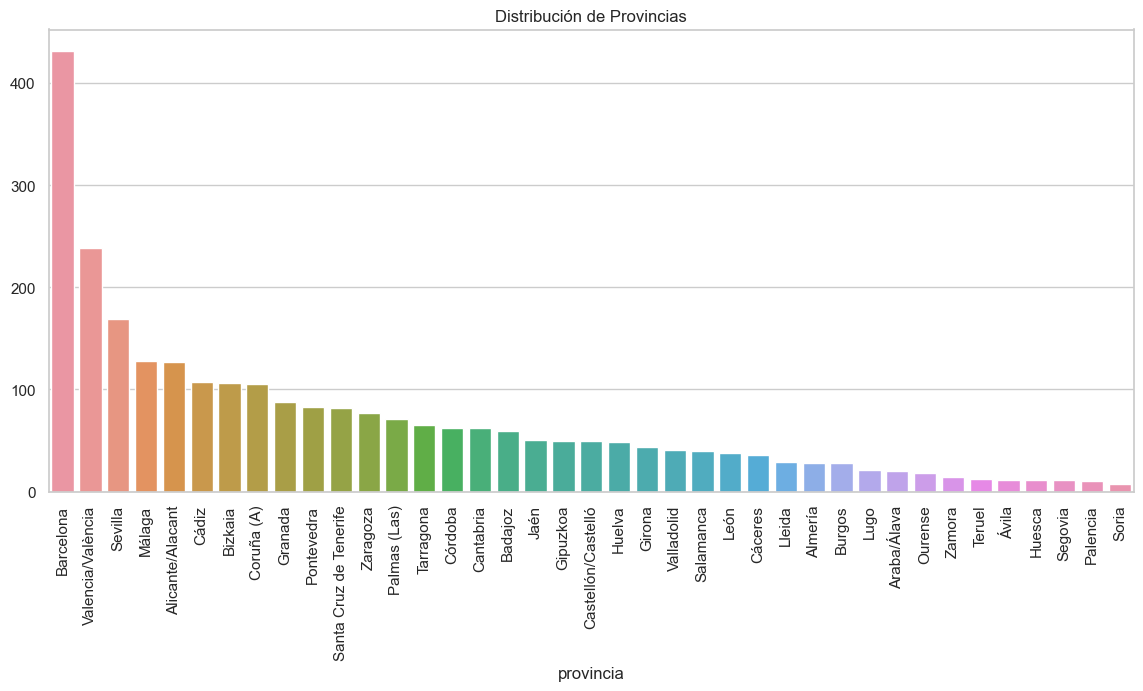

In [12]:
plt.figure(figsize=(14, 6))
sns.barplot(x=provincia_counts.index, y=provincia_counts.values)
plt.title('Distribución de Provincias')
plt.xticks(rotation=90)
plt.show()


* `6)Gráfico de comunidades autónomas`

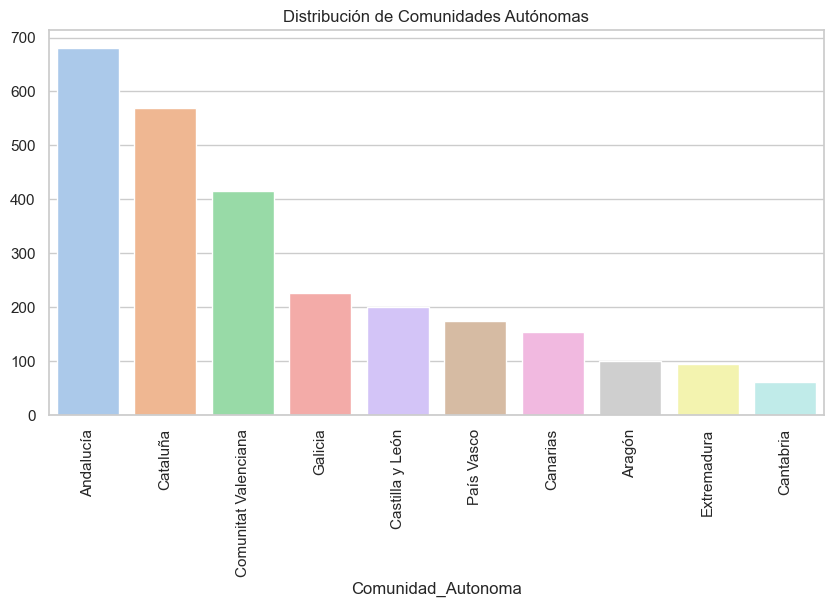

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x=comunidad_counts.index, y=comunidad_counts.values)
plt.title('Distribución de Comunidades Autónomas')
plt.xticks(rotation=90)
plt.show()

* `7)Mapa de calor relación Comunidad Autónoma vs Provincia`

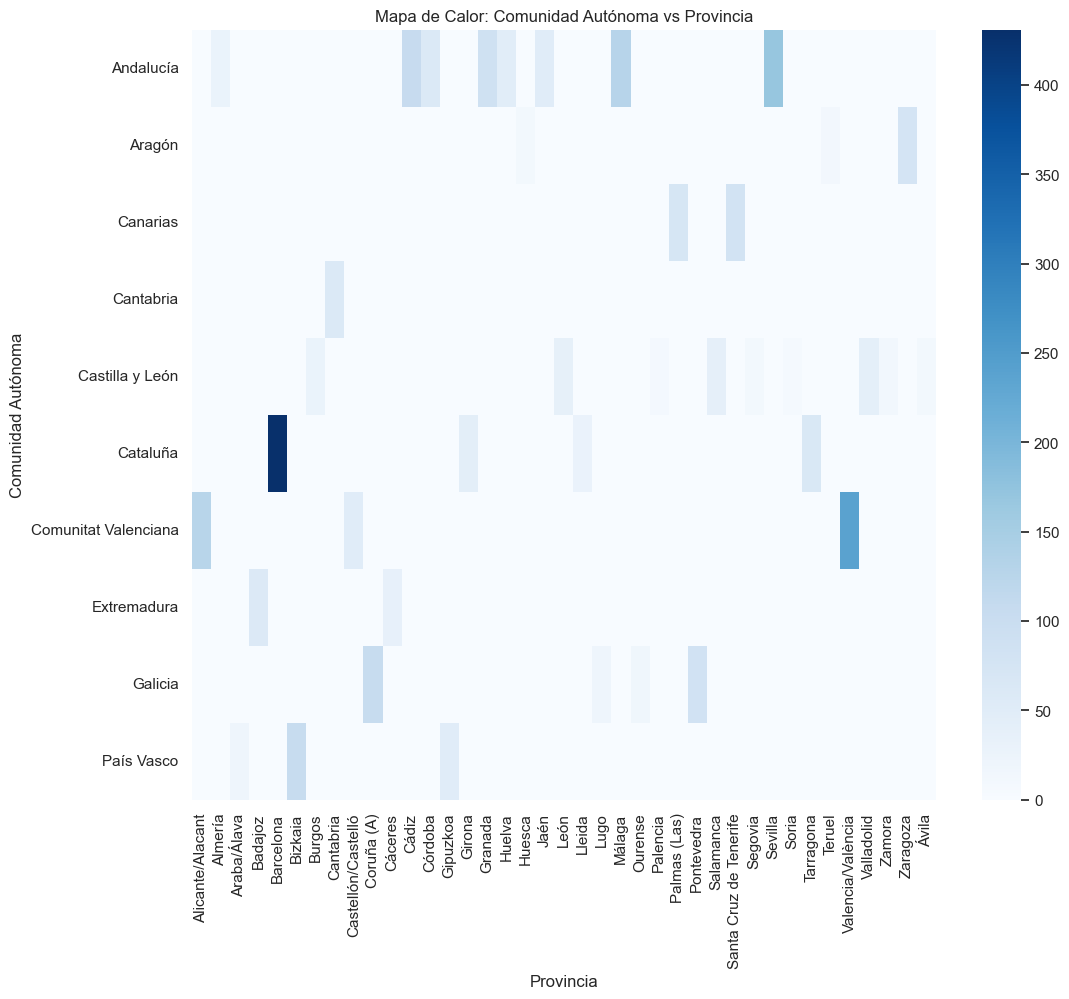

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(cross_tab, cmap='Blues', annot=False, cbar=True)
plt.title('Mapa de Calor: Comunidad Autónoma vs Provincia')
plt.xlabel('Provincia')
plt.ylabel('Comunidad Autónoma')
plt.show()


* `Análisis mapa de calor`

El mapa de calor confirma la relación uno-a-muchos entre Comunidad Autónoma y Provincia, con valores altos concentrados en la diagonal.  
Esto valida la consistencia de las etiquetas geográficas. Además, revela un desbalance muestral entre provincias, información relevante  
para el preprocesamiento y el ajuste de modelos predictivos.

## Análisis Estadístico: 

* `¿Tiene sentido aplicar una PCA conjunta sobre Comunidad Autónoma y Municipio si:`  
`Comunidad Autónoma está asociada a Renta_Per_Capita_2023_miles_euros y Municipio está asociado a ingreso_hogar`  

`¿Son suficientemente diferentes/complementarias esas dos dimensiones geográficas como para justificar una combinación vía PCA?`

Comparar las relaciones:
(A) Comunidad Autónoma y Renta per cápita
(B) Provincia y Ingreso hogar
Luego:
¿(A) y (B) representan dimensiones redundantes o complementarias?

+ Muestra la media de Renta_Per_Capita_2023_miles_euros por Comunidad y la moda de ingreso_hogar por Provincia:

In [15]:
# Renta per cápita por comunidad
resumen_comunidad = data.groupby('Comunidad_Autonoma')['Renta_Per_Capita_2023_miles_euros'].mean().sort_values(ascending=False)
print("Media de Renta per cápita por Comunidad Autónoma:")
print(resumen_comunidad)

# Ingreso hogar más frecuente por provincia
resumen_provincia = data.groupby('provincia')['ingreso_hogar'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print("\nIngreso hogar más frecuente por Provincia:")
print(resumen_provincia)

Media de Renta per cápita por Comunidad Autónoma:
Comunidad_Autonoma
País Vasco              39547.0
Cataluña                35325.0
Aragón                  34658.0
Castilla y León         29698.0
Galicia                 28644.0
Cantabria               28461.0
Comunitat Valenciana    26453.0
Canarias                24345.0
Extremadura             23604.0
Andalucía               23218.0
Name: Renta_Per_Capita_2023_miles_euros, dtype: float64

Ingreso hogar más frecuente por Provincia:
provincia
Alicante/Alacant          De 1.801 a 2.700 &euro;
Almería                   De 1.100 a 1.800 &euro;
Araba/Álava               De 1.801 a 2.700 &euro;
Badajoz                   De 1.801 a 2.700 &euro;
Barcelona                 De 2.701 a 3.900 &euro;
Bizkaia                       Más de 5.000 &euro;
Burgos                    De 1.801 a 2.700 &euro;
Cantabria                 De 1.100 a 1.800 &euro;
Castellón/Castelló        De 1.801 a 2.700 &euro;
Coruña (A)                De 1.100 a 1.800 &euro;
C

En este bloque se calcula:

La media de Renta_Per_Capita_2023_miles_euros agrupada por Comunidad Autónoma.  
La moda de ingreso_hogar agrupada por Provincia.  

Conclusión:
La media de la renta per cápita evidencia variabilidad significativa entre Comunidades Autónomas, reflejando diferencias estructurales a nivel macroeconómico.  
Por su parte, la moda del ingreso del hogar por Provincia muestra mayor dispersión y heterogeneidad, lo que sugiere que la Provincia constituye un nivel de  
análisis más granular.  
Esta diferencia de escala y detalle respalda la hipótesis de que ambas variables contienen información complementaria relevante para la modelización.

+ Muestra la media de Renta_Per_Capita_2023_miles_euros por Comunidad y la moda de ingreso_hogar por Provincia:

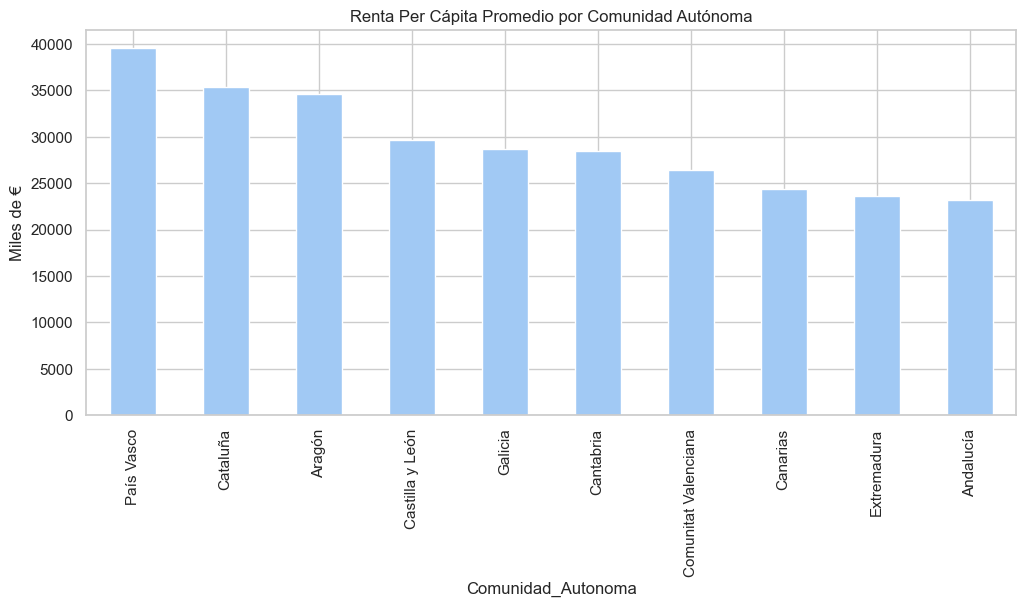

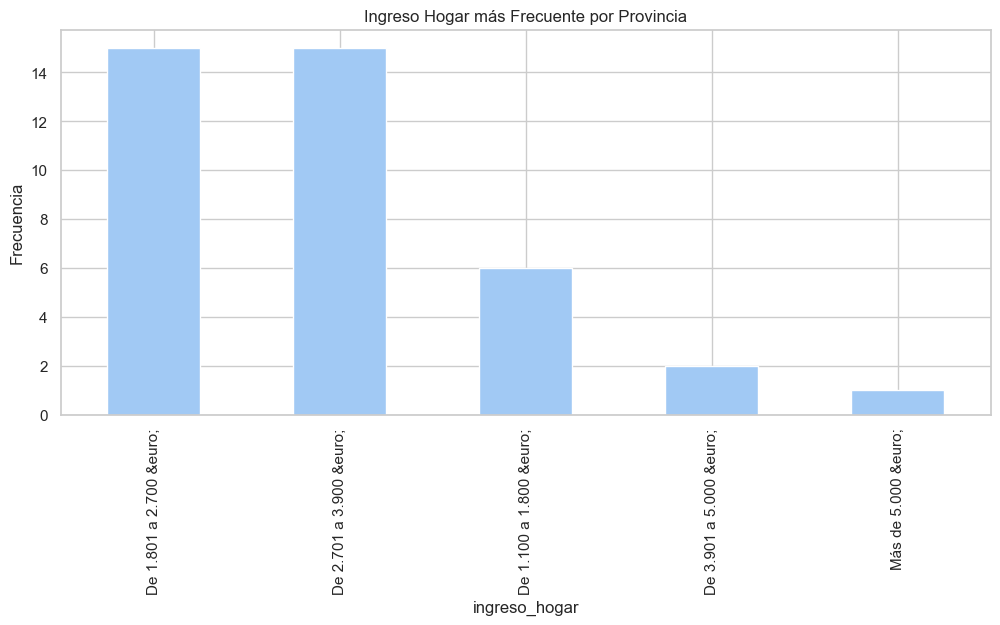

In [16]:
# Gráfico de barras de renta per cápita por comunidad
resumen_comunidad.plot(kind='bar', figsize=(12, 5), title='Renta Per Cápita Promedio por Comunidad Autónoma')
plt.ylabel('Miles de €')
plt.show()

# Gráfico de barras de ingreso hogar por provincia
resumen_provincia.value_counts().plot(kind='bar', figsize=(12, 5), title='Ingreso Hogar más Frecuente por Provincia')
plt.ylabel('Frecuencia')
plt.show()


Se generan gráficos de barras que comparan:

La renta per cápita promedio por Comunidad Autónoma.
La moda del ingreso del hogar por Provincia.  
Conclusión:
La visualización permite identificar la heterogeneidad entre provincias incluso dentro de la misma Comunidad Autónoma.  
  
Esto indica que la variable Provincia aporta información adicional no capturada en su totalidad por la media de la Comunidad Autónoma.  
En términos analíticos, se revela la existencia de variación intra-regional significativa, lo que justifica la necesidad de incluir  
ambos niveles territoriales en los modelos predictivos para mejorar la capacidad explicativa.

* Mapa de calor cruzado (combinación regiones vs. ingresos)

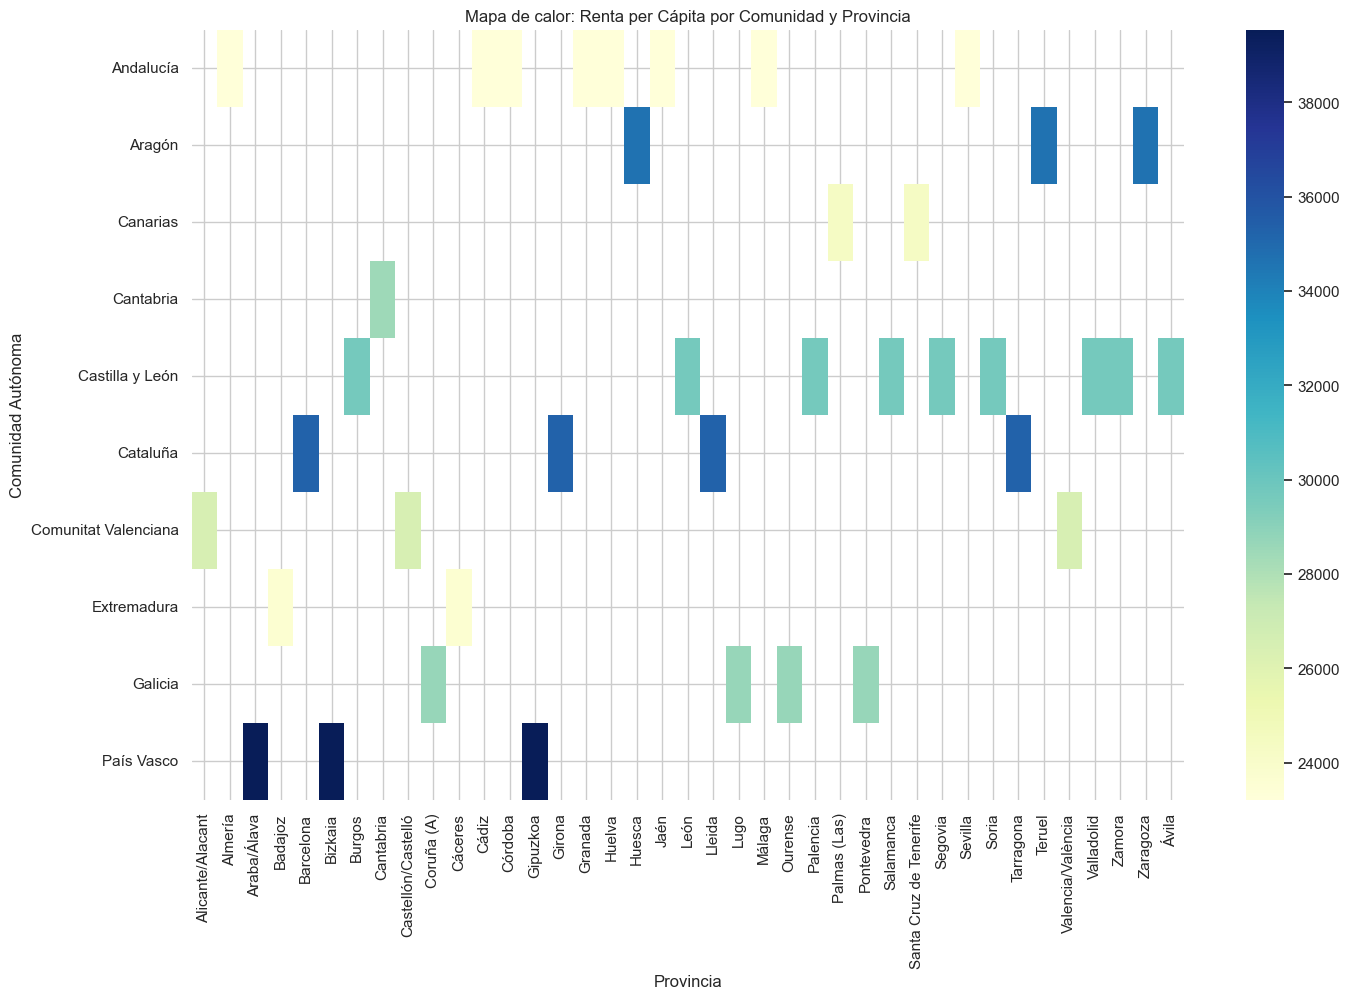

In [17]:
pivot = data.pivot_table(
    index='Comunidad_Autonoma',
    columns='provincia',
    values='Renta_Per_Capita_2023_miles_euros',
    aggfunc='mean'
)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Mapa de calor: Renta per Cápita por Comunidad y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Comunidad Autónoma')
plt.show()


Se construye un mapa de calor que representa la media de la renta per cápita en la matriz Comunidad Autónoma–Provincia.

Conclusión:  
El mapa de calor permite analizar la dependencia jerárquica entre Comunidad Autónoma y Provincia.  

Aunque la Comunidad Autónoma explica parte importante de la variabilidad global (estructura vertical del mapa),  
la Provincia introduce una subestructura relevante (estructura horizontal), evidenciando correlación parcial pero no perfecta entre ambas variables.  
Este resultado sugiere la conveniencia de aplicar técnicas como PCA,  
que permitan codificar conjuntamente ambas dimensiones eliminando la multicolinealidad sin pérdida sustancial de información.

<u>Conclusión general del análisis</u>

El análisis previo demuestra que Comunidad Autónoma y Provincia son variables correlacionadas pero no redundantes:  
la primera captura efectos estructurales regionales (macro), mientras la segunda permite modelar heterogeneidad local (micro).  
La incorporación de renta per cápita a nivel autonómico y del ingreso del hogar a nivel provincial resalta su complementariedad explicativa.

En este contexto, la aplicación de PCA conjunta para ambas variables aparece como una estrategia metodológicamente sólida, ya que:  

√ Reduce la dimensionalidad del espacio de características.  
√ Mitiga la multicolinealidad inherente a la estructura jerárquica.  
√ Preserva la mayor parte de la varianza informativa relevante.

Sin embargo, se reconoce que dicha transformación implica cierta pérdida de interpretabilidad directa de las variables originales,  
motivo por el cual este análisis exploratorio resulta esencial para justificar su empleo en el diseño del modelo predictivo.

#### Tratamiento columna ingreso_hogar

In [18]:
print(data['ingreso_hogar'].unique())


['De 2.701 a 3.900 &euro;' 'Menos de 1.100 &euro;' 'Más de 5.000 &euro;'
 'De 3.901 a 5.000 &euro;' 'De 1.100 a 1.800 &euro;'
 'De 1.801 a 2.700 &euro;' 'N.S.' 'N.C.']


In [19]:
# Mapeo inicial
mapeo_ingreso_hogar = {
    'Menos de 1.100 &euro;': 1,
    'De 1.100 a 1.800 &euro;': 2,
    'De 1.801 a 2.700 &euro;': 3,
    'De 2.701 a 3.900 &euro;': 4,
    'De 3.901 a 5.000 &euro;': 5,
    'Más de 5.000 &euro;': 6,
    'N.S.': 0,
    'N.C.': 0
}

# Crear columna numérica temporal con el mapeo original
data['ingreso_hogar_ord'] = data['ingreso_hogar'].map(mapeo_ingreso_hogar)

# Calcular la moda excluyendo 0
moda = data.loc[data['ingreso_hogar_ord'] != 0, 'ingreso_hogar_ord'].mode()[0]

# Reemplazar 0 por la moda
data['ingreso_hogar_ord'] = data['ingreso_hogar_ord'].replace(0, moda)


In [20]:
data[['ingreso_hogar', 'ingreso_hogar_ord']].drop_duplicates().sort_values('ingreso_hogar_ord')

,ingreso_hogar,ingreso_hogar_ord
1,Menos de 1.100 &euro;,1
5,De 1.100 a 1.800 &euro;,2
8,De 1.801 a 2.700 &euro;,3
34,N.S.,3
36,N.C.,3
0,De 2.701 a 3.900 &euro;,4
3,De 3.901 a 5.000 &euro;,5
2,Más de 5.000 &euro;,6


#### Tratamiento Sexo:Variable binaria: convertir a 0/1 (M/F).

In [21]:
data['sexo_num'] = (data['sexo'] == 'F').astype(int)

#### Tratamiento Edad: Numérica, solo verificar valores inválidos o outliers.

In [22]:
# Convertir a numérico por si acaso
data['edad'] = pd.to_numeric(data['edad'], errors='coerce')

# Opcional: eliminar edades imposibles (ejemplo: menor de 0 o mayor de 120)
data = data[(data['edad'] >= 0) & (data['edad'] <= 120)]


#### 4. nivel_educacion: Variable ordinal

In [23]:
mapping_educacion = {
    'Sin estudios': 0,
    'Primaria': 1,
    'Secundaria': 2,
    'Bachillerato': 3,
    'Universidad': 4,
    'Postgrado': 5
}
data['nivel_educacion_num'] = data['nivel_educacion'].map(mapping_educacion)


#### 5. autoubicacion_ideologica: convertir a numérico.

In [24]:
data['autoubicacion_ideologica'] = pd.to_numeric(data['autoubicacion_ideologica'], errors='coerce')

#### 6. intencion_voto_generales
Codificar categorías con one-hot (si pocas categorías)
Mapear a números (por ejemplo, partidos políticos a números)
Agrupar partidos por ideología y mapear

In [25]:
print(data['intencion_voto_generales'].unique())

['PP' 'Voto nulo' 'VOX' 'No sabe todavía' 'PSOE' 'Podemos' 'No votaría'
 'En blanco' 'PACMA' 'Sumar' 'N.C.' 'Otro partido' 'Frente Obrero'
 'Jaén Merece Más' 'Ciudadanos' 'EAJ-PNV' 'Adelante Andalucía'
 'Andalucía Por Sí' 'Partido Libertario' 'Teruel Existe' 'PAR' 'CCa'
 'Nueva Canarias' 'ERC' 'España Vaciada' 'Falange Española de las JONS'
 'JxCat' 'CUP' 'Escaños en Blanco' 'BNG' 'En Comú Podem' 'Los Verdes'
 'Compromís' 'IU' 'Caminando Juntos' 'EH Bildu']


In [26]:
bloques = {
    'PSOE': 'Centro',
    'Podemos': 'Izquierda',
    'Sumar': 'centro',
    'IU': 'Izquierda',
    'En Comú Podem': 'Izquierda',
    'Frente Obrero': 'Izquierda',
    'ERC': 'Izquierda',
    'CUP': 'Izquierda',
    'EH Bildu': 'Izquierda',
    'BNG': 'Izquierda',
    'Compromís': 'Izquierda',

    'PP': 'Centro-Derecha',
    'VOX': 'Extrema_Derecha',
    'Ciudadanos': 'Centro-Derecha',
    'JxCat': 'Centro-Derecha',
    'EAJ-PNV': 'Centro-Derecha',
    'CCa': 'Centro-Derecha',
    'PAR': 'Centro-Derecha',
    'Caminando Juntos': 'Centro-Derecha',

    'Nueva Canarias': 'Centro-Izquierda',
    'Otro partido': 'Centro',
    'PACMA': 'Centro',
    'Los Verdes': 'Centro',
    'Teruel Existe': 'Centro',
    'España Vaciada': 'Centro',
    'Andalucía Por Sí': 'Centro',

    'Voto nulo': 'N/A',
    'En blanco': 'N/A',
    'No sabe todavía': 'N/A',
    'N.C.': 'N/A',
    'No votaría': 'N/A',
    'Escaños en Blanco': 'N/A',
    'Partido Libertario': 'Derecha',
    'Falange Española de las JONS': 'Derecha',
    'Adelante Andalucía': 'Izquierda'
}


In [27]:
# Mapear cada voto al bloque ideológico
data['bloque_ideologico'] = data['intencion_voto_generales'].map(bloques)

# Verificar resultado
print(data[['intencion_voto_generales', 'bloque_ideologico']].head())


  intencion_voto_generales bloque_ideologico
0                       PP    Centro-Derecha
1                Voto nulo               N/A
2                      VOX   Extrema_Derecha
3          No sabe todavía               N/A
4                     PSOE            Centro


In [28]:
bloque_orden = {
    'Izquierda': 1,
    'Centro-Izquierda': 2,
    'Centro': 3,
    'Centro-Derecha': 4,
    'Derecha': 5,
    'N/A': 0
}

data['bloque_ideologico_ord'] = data['bloque_ideologico'].map(bloque_orden)

# Verificar resultado final
print(data[['intencion_voto_generales', 'bloque_ideologico', 'bloque_ideologico_ord']].head())


  intencion_voto_generales bloque_ideologico  bloque_ideologico_ord
0                       PP    Centro-Derecha                    4.0
1                Voto nulo               N/A                    0.0
2                      VOX   Extrema_Derecha                    NaN
3          No sabe todavía               N/A                    0.0
4                     PSOE            Centro                    3.0


## 3) Análisis estadístico de las variables:  
√ comunidad_autonomica,  
√ ingreso_hogar,  
√ sexo,  
√ edad,  
√ nivel_educacion,  
√ autoubicacion_ideologica,  
√ intencion_voto_generales


#### Bloque 1: Preparación de datos agregados por Comunidad Autónoma

 definimos las columnas a usar

In [29]:
variables_tratadas = [
    'ingreso_hogar_ord',
    'sexo_bin',
    'edad',
    'nivel_educacion_ord',
    'autoubicacion_ideologica_ord',
    'bloque_ideologico_ord'
]


Agrupar por Comunidad Autónoma y calcular medias

In [30]:
print(data.columns)

Index(['provincia', 'Comunidad_Autonoma', 'ingreso_hogar',
       'Renta_Per_Capita_2023_miles_euros', 'habitantes_municipio', 'sexo',
       'edad', 'percepcion_clase_social', 'nivel_educacion',
       'probabilidad_voto_generales', 'autoubicacion_ideologica',
       'intencion_voto_generales', 'ingreso_hogar_ord', 'sexo_num',
       'nivel_educacion_num', 'bloque_ideologico', 'bloque_ideologico_ord'],
      dtype='object')


In [31]:
# Veamos los valores únicos para confirmar los casos
print(data['autoubicacion_ideologica'].unique())


[ 8. nan  4.  2.  5.  9.  7.  6.  3.]


In [32]:
variables_tratadas = [
    'ingreso_hogar_ord', 'sexo_num', 'edad', 
    'nivel_educacion_num', 'autoubicacion_ideologica', 
    'bloque_ideologico_ord'
]


In [33]:
estadisticas_comunidad = data.groupby('Comunidad_Autonoma')[variables_tratadas].mean().reset_index()
print(estadisticas_comunidad)


     Comunidad_Autonoma  ingreso_hogar_ord  sexo_num       edad  \
0             Andalucía           3.410294       0.0  50.102941   
1                Aragón           3.590000       0.0  53.980000   
2              Canarias           3.470588       0.0  51.176471   
3             Cantabria           3.274194       0.0  50.935484   
4       Castilla y León           3.555000       0.0  53.280000   
5              Cataluña           3.894552       0.0  51.374341   
6  Comunitat Valenciana           3.510843       0.0  51.200000   
7           Extremadura           3.063158       0.0  52.136842   
8               Galicia           3.502203       0.0  50.964758   
9            País Vasco           4.108571       0.0  52.451429   

   nivel_educacion_num  autoubicacion_ideologica  bloque_ideologico_ord  
0                  NaN                  5.269811               2.389655  
1                  NaN                  5.419753               2.252874  
2                  NaN                  

In [34]:
print(data['autoubicacion_ideologica'].dtype)
print(data['autoubicacion_ideologica'].unique())
print(data['autoubicacion_ideologica'].value_counts(dropna=False)) # Para ver la distribución, incluyendo NaNs


float64
[ 8. nan  4.  2.  5.  9.  7.  6.  3.]
autoubicacion_ideologica
NaN    573
5.0    535
3.0    383
7.0    262
4.0    256
6.0    246
8.0    196
2.0    177
9.0     48
Name: count, dtype: int64


In [35]:
from sklearn.preprocessing import OrdinalEncoder

    
bloques = {
    'PSOE': 'Centro', 'Podemos': 'Izquierda', 'Sumar': 'Centro', 'IU': 'Izquierda',
    'En Comú Podem': 'Izquierda', 'Frente Obrero': 'Izquierda', 'ERC': 'Izquierda',
    'CUP': 'Izquierda', 'EH Bildu': 'Izquierda', 'BNG': 'Izquierda', 'Compromís': 'Izquierda',
    'PP': 'Centro-Derecha', 'VOX': 'Extrema_Derecha', 'Ciudadanos': 'Centro-Derecha',
    'JxCat': 'Centro-Derecha', 'EAJ-PNV': 'Centro-Derecha', 'CCa': 'Centro-Derecha',
    'PAR': 'Centro-Derecha', 'Caminando Juntos': 'Centro-Derecha',
    'Nueva Canarias': 'Centro-Izquierda', 'Otro partido': 'Centro', 'PACMA': 'Centro',
    'Los Verdes': 'Centro', 'Teruel Existe': 'Centro', 'España Vaciada': 'Centro',
    'Andalucía Por Sí': 'Centro',
    'Voto nulo': 'N/A', 'En blanco': 'N/A', 'No sabe todavía': 'N/A', 'N.C.': 'N/A',
    'No votaría': 'N/A', 'Escaños en Blanco': 'N/A', 'Partido Libertario': 'Derecha',
    'Falange Española de las JONS': 'Derecha', 'Adelante Andalucía': 'Izquierda'
}

data['bloque_ideologico'] = data['intencion_voto_generales'].map(bloques).fillna('Desconocido')

orden_bloques = [
    'Extrema_Derecha', 'Derecha', 'Centro-Derecha', 'Centro',
    'Centro-Izquierda', 'Izquierda', 'N/A'
]

encoder_bloques = OrdinalEncoder(categories=[orden_bloques], handle_unknown='use_encoded_value', unknown_value=-1)
data['bloque_ideologico_ord'] = encoder_bloques.fit_transform(data[['bloque_ideologico']])

variables_tratadas = [
    'ingreso_hogar_ord',
    'sexo_num',
    'edad',
    'nivel_educacion_num',
    'autoubicacion_ideologica',
    'bloque_ideologico_ord'
]

estadisticas_comunidad = data.groupby('Comunidad_Autonoma')[variables_tratadas].mean().reset_index()


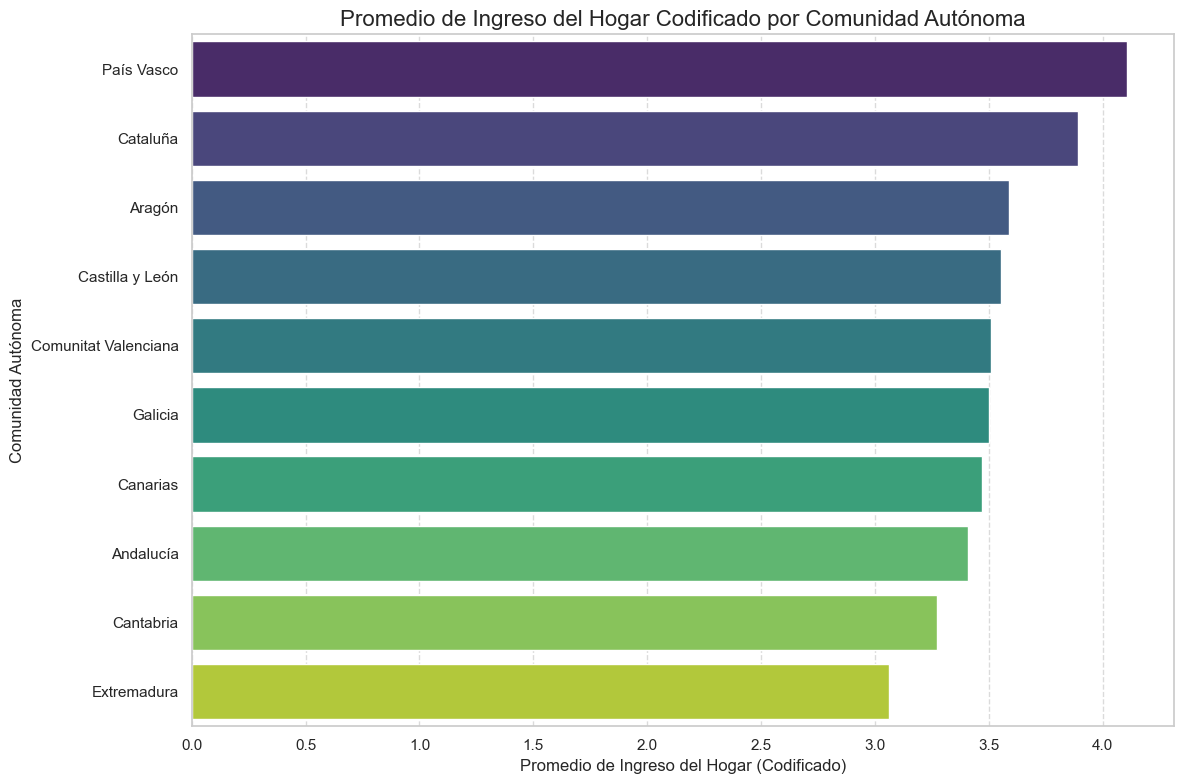

In [36]:
# Ordenar las comunidades por el promedio de ingreso_hogar_ord para una mejor visualización
estadisticas_comunidad_sorted = estadisticas_comunidad.sort_values(by='ingreso_hogar_ord', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='ingreso_hogar_ord',
    y='Comunidad_Autonoma',
    data=estadisticas_comunidad_sorted,
    palette='viridis' # Puedes cambiar la paleta de colores si lo deseas
)

plt.title('Promedio de Ingreso del Hogar Codificado por Comunidad Autónoma', fontsize=16)
plt.xlabel('Promedio de Ingreso del Hogar (Codificado)', fontsize=12)
plt.ylabel('Comunidad Autónoma', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Análisis del Promedio de Ingreso del Hogar Codificado por Comunidad Autónoma

1. Introducción
El presente análisis se centra en la visualización de la distribución del promedio de ingreso del hogar, categorizado y codificado ordinalmente (ingreso_hogar_ord), a través de las distintas Comunidades Autónomas. El objetivo es identificar patrones de disparidad socioeconómica a nivel regional, utilizando una representación gráfica que facilita la comparación interregional.

2. Metodología
La variable ingreso_hogar_ord es una transformación ordinal de los datos de ingreso del hogar, donde valores numéricos crecientes corresponden a categorías de ingreso más elevadas. El gráfico de barras presenta la media aritmética de esta variable para cada Comunidad Autónoma, ordenadas de forma descendente para facilitar la identificación de las regiones con promedios más altos y más bajos. La elección de una escala ordinal implica que, si bien se puede calcular una media, esta representa una tendencia central dentro de las categorías, y no una magnitud continua directamente comparable en términos de ratio.

3. Resultados y Observaciones
El gráfico revela una heterogeneidad significativa en el promedio del ingreso del hogar codificado entre las Comunidades Autónomas.

Disparidades Regionales: Se observa una clara gradación, con ciertas Comunidades Autónomas exhibiendo consistentemente promedios de ingreso_hogar_ord superiores, situándose en el extremo superior de la distribución. Estas regiones, representadas por barras de mayor longitud, indican una concentración de hogares en categorías de ingreso más elevadas.

Extremos de la Distribución: En contraste, las Comunidades Autónomas en el extremo inferior del gráfico presentan promedios notablemente menores, sugiriendo una prevalencia de hogares en categorías de ingreso más bajas dentro de la escala ordinal.

Continuo de Ingresos: La visualización permite apreciar un continuo en los promedios de ingreso codificado, desde las comunidades con los valores más altos hasta las más bajas, lo que subraya la persistencia de diferencias socioeconómicas regionales.

4. Discusión e Implicaciones
La disparidad observada en los promedios de ingreso_hogar_ord entre Comunidades Autónomas es un reflejo de las complejas dinámicas socioeconómicas y estructurales de cada región. Factores como la estructura productiva, el mercado laboral, los niveles de empleo y desempleo, la demografía, y las políticas públicas regionales, pueden contribuir a estas diferencias en la distribución de categorías de ingreso.

Es crucial interpretar estos resultados con la debida cautela, dado el carácter ordinal de la variable. La media de una variable ordinal indica la tendencia central de las categorías, pero no permite inferencias sobre la magnitud proporcional de las diferencias de ingreso en términos absolutos. No obstante, el gráfico es una herramienta eficaz para identificar las Comunidades Autónomas que se posicionan de manera diferencial en la escala socioeconómica.

5. Conclusión
El análisis gráfico del promedio de ingreso del hogar codificado por Comunidad Autónoma subraya la existencia de marcadas disparidades socioeconómicas a nivel regional. Esta visualización proporciona una base para futuras investigaciones que profundicen en los factores subyacentes a estas diferencias, así como para la formulación de políticas públicas orientadas a la cohesión territorial y la reducción de desigualdades.

* Estidio de los NaN por comunidaes

In [37]:
# Contar los valores NaN en 'autoubicacion_ideologica' por cada 'Comunidad_Autonoma'
nan_por_comunidad = data.groupby('Comunidad_Autonoma')['autoubicacion_ideologica'].apply(lambda x: x.isnull().sum())

# Convertir la Serie resultante a un DataFrame para una mejor visualización
nan_por_comunidad_df = nan_por_comunidad.reset_index(name='Num_NaNs')

# Ordenar por el número de NaNs de forma descendente para ver las comunidades con más NaNs primero
nan_por_comunidad_df = nan_por_comunidad_df.sort_values(by='Num_NaNs', ascending=False)

print("Número de valores NaN en 'autoubicacion_ideologica' por Comunidad Autónoma:")
print(nan_por_comunidad_df.to_string(index=False))

Número de valores NaN en 'autoubicacion_ideologica' por Comunidad Autónoma:
  Comunidad_Autonoma  Num_NaNs
           Andalucía       150
            Cataluña       111
Comunitat Valenciana        89
             Galicia        45
          País Vasco        42
            Canarias        41
         Extremadura        32
     Castilla y León        30
              Aragón        19
           Cantabria        14


El código tiene encuenta: NaN por comunidades y a ese resultado le aplica la moda

In [38]:
nan_por_comunidad = data.groupby('Comunidad_Autonoma')['autoubicacion_ideologica'].apply(lambda x: x.isnull().sum())

nan_por_comunidad_df = nan_por_comunidad.reset_index(name='Num_NaNs')

nan_por_comunidad_df = nan_por_comunidad_df.sort_values(by='Num_NaNs', ascending=False)

print("Número de valores NaN en 'autoubicacion_ideologica' por Comunidad Autónoma:")
print(nan_por_comunidad_df.to_string(index=False))

for comunidad in data['Comunidad_Autonoma'].unique():
    subset_comunidad = data[data['Comunidad_Autonoma'] == comunidad]

    if not subset_comunidad['autoubicacion_ideologica'].mode().empty:
        moda_comunidad = subset_comunidad['autoubicacion_ideologica'].mode()[0]
    else:
        moda_comunidad = 0

    data.loc[
        (data['Comunidad_Autonoma'] == comunidad) & (data['autoubicacion_ideologica'].isna()),
        'autoubicacion_ideologica'
    ] = moda_comunidad

print("\nValores NaN en 'autoubicacion_ideologica' después de la imputación por comunidad:")
print(data['autoubicacion_ideologica'].isnull().sum())


Número de valores NaN en 'autoubicacion_ideologica' por Comunidad Autónoma:
  Comunidad_Autonoma  Num_NaNs
           Andalucía       150
            Cataluña       111
Comunitat Valenciana        89
             Galicia        45
          País Vasco        42
            Canarias        41
         Extremadura        32
     Castilla y León        30
              Aragón        19
           Cantabria        14

Valores NaN en 'autoubicacion_ideologica' después de la imputación por comunidad:
0


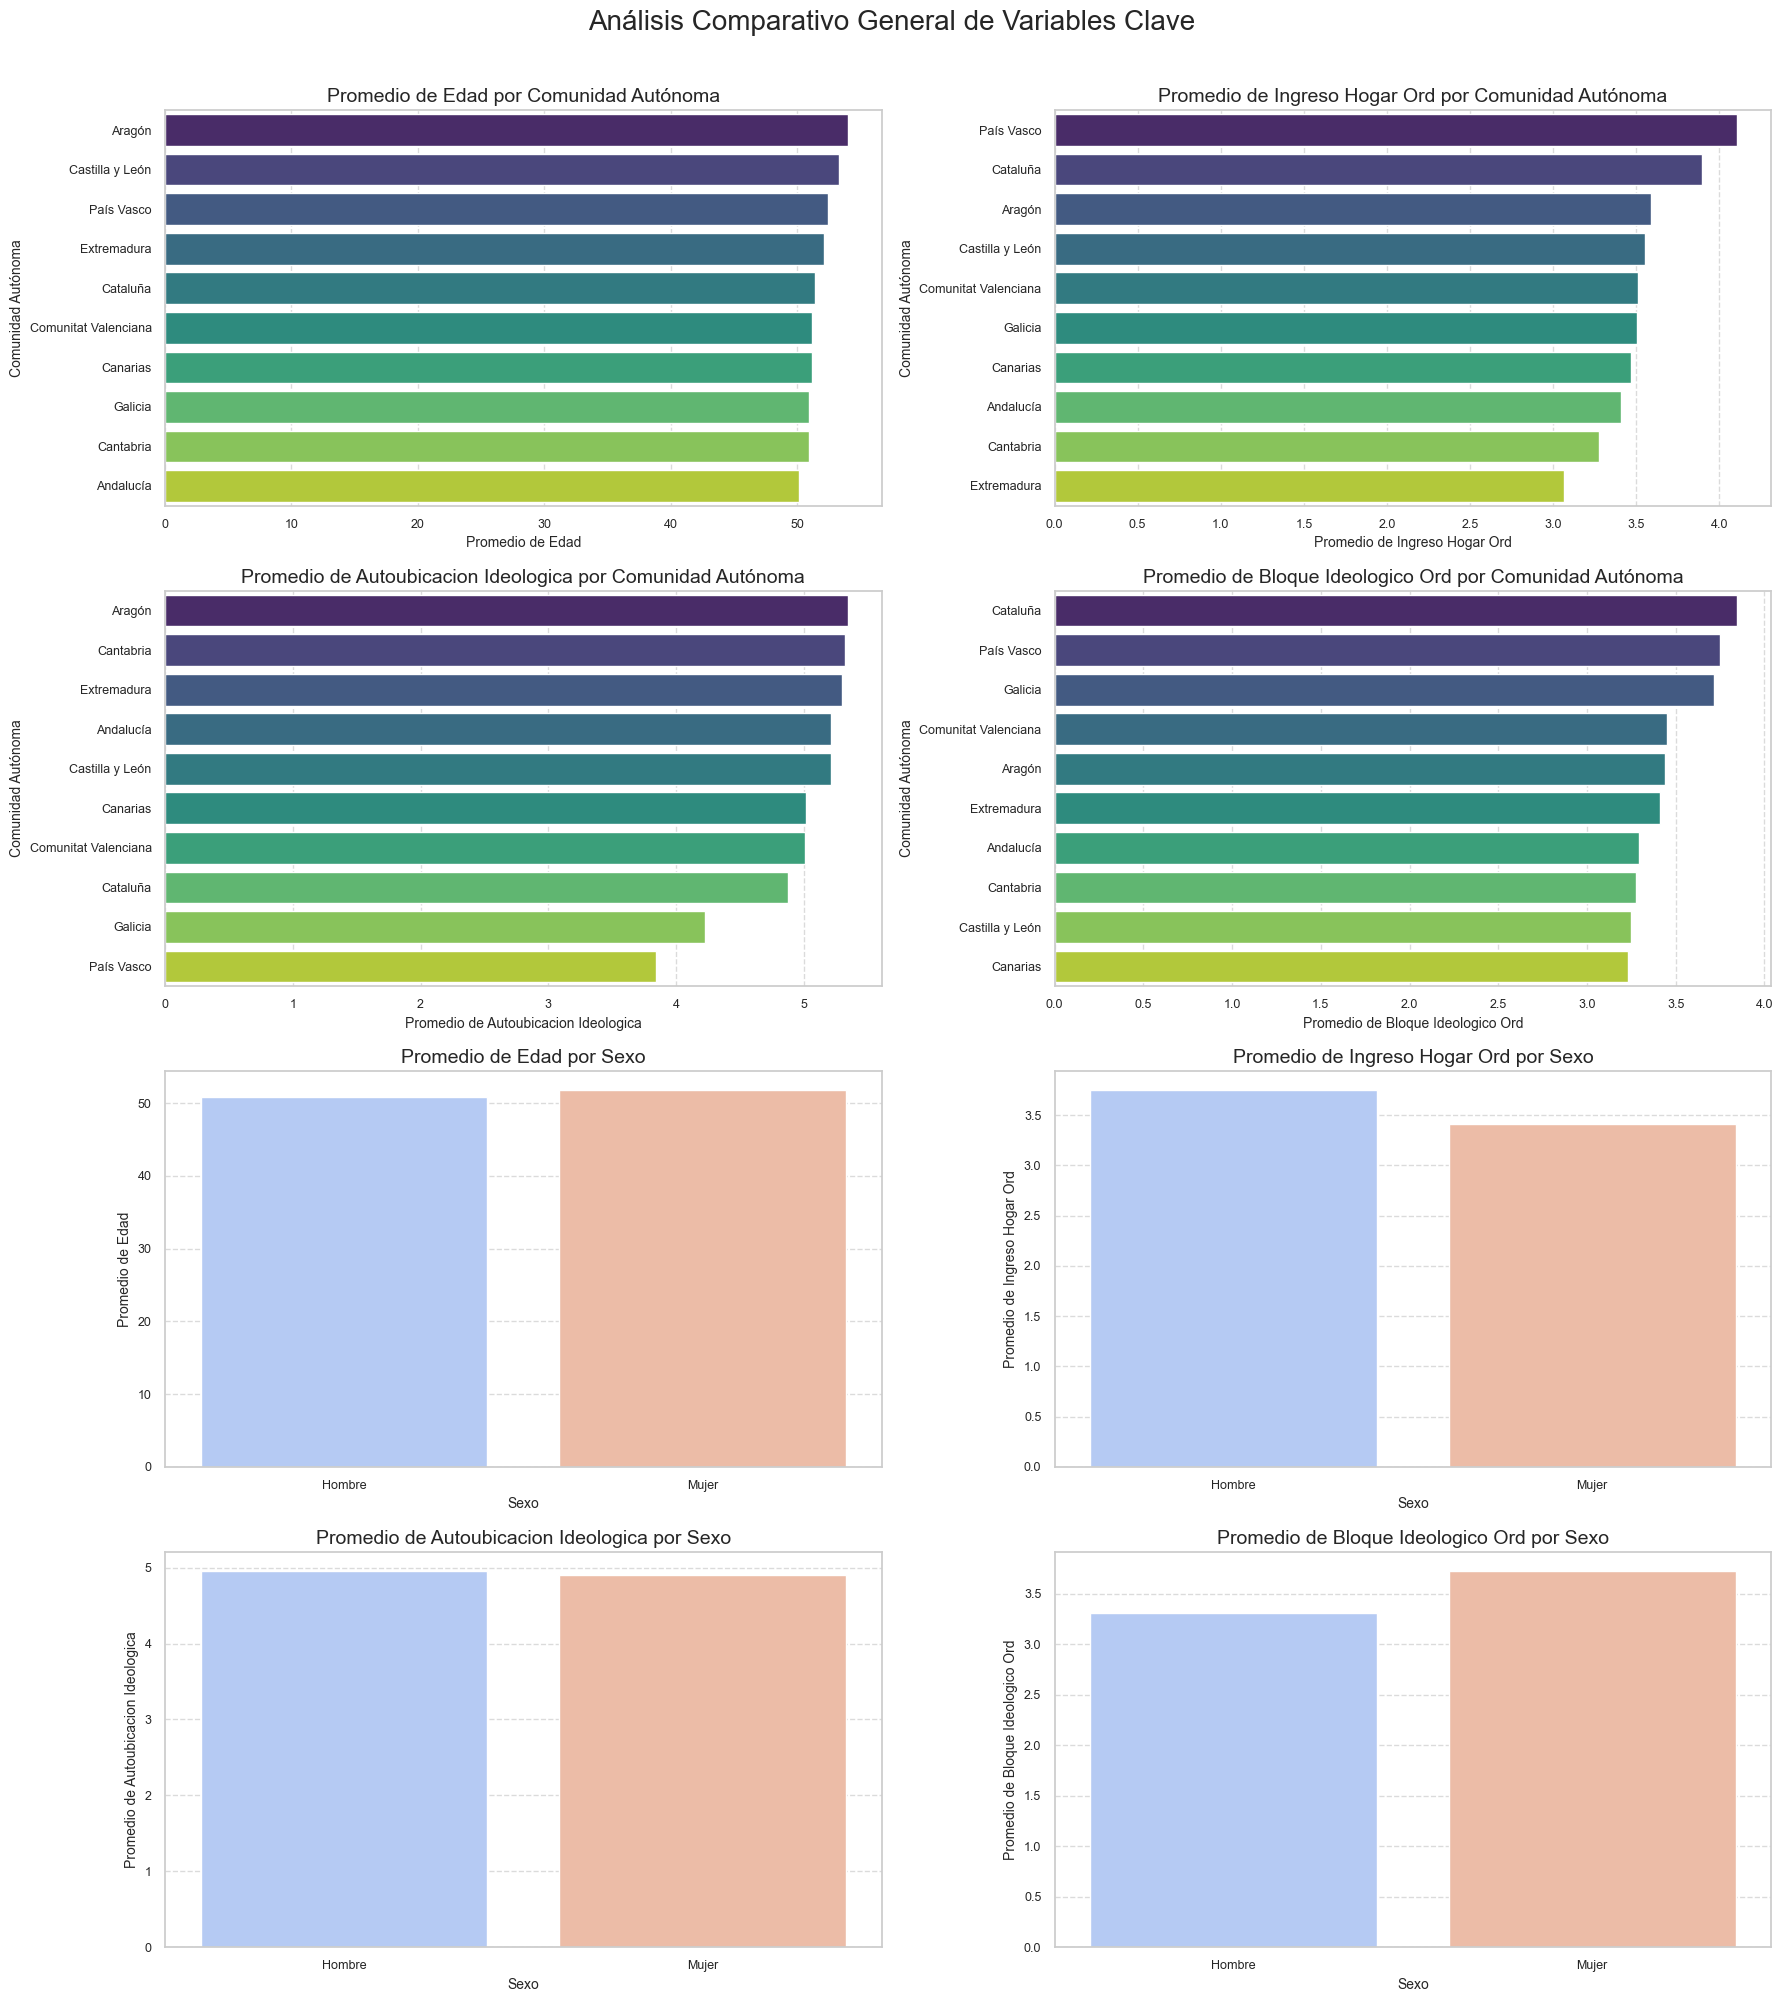

In [39]:
numerical_vars = [
    'edad',
    'ingreso_hogar_ord',
    'autoubicacion_ideologica',
    'bloque_ideologico_ord'
]

avg_by_comunidad = data.dropna(subset=numerical_vars + ['Comunidad_Autonoma']).groupby('Comunidad_Autonoma')[numerical_vars].mean().reset_index()

avg_by_sex = data.dropna(subset=numerical_vars + ['sexo']).groupby('sexo')[numerical_vars].mean().reset_index()

fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=2, figsize=(18, 5 * len(numerical_vars)))
axes = axes.flatten()

plot_idx = 0

for var in numerical_vars:
    if var in avg_by_comunidad.columns:
        plot_data = avg_by_comunidad.sort_values(by=var, ascending=False)
        sns.barplot(x=var, y='Comunidad_Autonoma', data=plot_data, palette='viridis', ax=axes[plot_idx])
        axes[plot_idx].set_title(f'Promedio de {var.replace("_", " ").title()} por Comunidad Autónoma', fontsize=14)
        axes[plot_idx].set_xlabel(f'Promedio de {var.replace("_", " ").title()}', fontsize=10)
        axes[plot_idx].set_ylabel('Comunidad Autónoma', fontsize=10)
        axes[plot_idx].tick_params(axis='x', labelsize=9)
        axes[plot_idx].tick_params(axis='y', labelsize=9)
        axes[plot_idx].grid(axis='x', linestyle='--', alpha=0.7)
        plot_idx += 1

for var in numerical_vars:
    if var in avg_by_sex.columns:
        sns.barplot(x='sexo', y=var, data=avg_by_sex, palette='coolwarm', ax=axes[plot_idx])
        axes[plot_idx].set_title(f'Promedio de {var.replace("_", " ").title()} por Sexo', fontsize=14)
        axes[plot_idx].set_xlabel('Sexo', fontsize=10)
        axes[plot_idx].set_ylabel(f'Promedio de {var.replace("_", " ").title()}', fontsize=10)
        axes[plot_idx].tick_params(axis='x', labelsize=9, rotation=0)
        axes[plot_idx].tick_params(axis='y', labelsize=9)
        axes[plot_idx].grid(axis='y', linestyle='--', alpha=0.7)
        plot_idx += 1

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Análisis Comparativo General de Variables Clave', fontsize=20, y=1.0)
plt.show()


Análisis de los Gráficos Comparativos de Variables Clave por Comunidad Autónoma y Sexo

1. Introducción
El presente análisis se fundamenta en un conjunto de gráficos de barras diseñados para visualizar la distribución de variables demográficas y socioeconómicas clave (edad, ingreso del hogar codificado, auto-ubicación ideológica y bloque ideológico codificado) en función de dos dimensiones contextuales: la Comunidad Autónoma y el Sexo. El propósito principal es describir las diferencias sistemáticas observadas en los promedios de estas variables entre los subgrupos poblacionales definidos por dichas dimensiones.

2. Metodología de Visualización
Se han generado ocho gráficos de barras, estructurados en una cuadrícula de 4 filas por 2 columnas. Cada fila se dedica a una de las cuatro variables de interés, las cuales son de naturaleza numérica o han sido transformadas a una escala ordinal (edad, ingreso_hogar_ord, autoubicacion_ideologica, bloque_ideologico_ord). La primera columna de la cuadrícula presenta los promedios de estas variables agrupados por Comunidad_Autonoma, mientras que la segunda columna muestra los promedios agrupados por sexo. La ordenación de las barras en los gráficos por Comunidad_Autonoma se realiza de forma descendente en función del promedio de la variable, facilitando la identificación de las regiones con los valores más elevados. Para el cálculo de los promedios, se han excluido sistemáticamente los valores nulos, garantizando la robustez de las estadísticas presentadas.

3. Resultados y Observaciones por Variable y Dimensión

3.1. Promedio de Edad

Por Comunidad Autónoma: El gráfico de barras que representa la edad promedio por Comunidad Autónoma evidencia variaciones notables en la estructura etaria regional. Se observa que Comunidades Autónomas como Aragón, País Vasco y Castilla y León exhiben una media de edad superior en su población, lo que indica una mayor proporción de individuos en rangos de edad avanzados. En contraste, comunidades como Andalucía, Galicia y Canarias presentan una media de edad inferior, reflejando una composición poblacional más joven.

Por Sexo: La comparación de la edad promedio por sexo revela las diferencias en la composición etaria entre las categorías de género en la muestra. Se observa que Mujer posee una edad promedio superior a Hombre, indicando que este grupo demográfico tiene una edad promedio más alta.

3.2. Promedio de Ingreso del Hogar Codificado (ingreso_hogar_ord)

Por Comunidad Autónoma: Este gráfico ilustra las disparidades socioeconómicas a nivel regional. Las Comunidades Autónomas como País Vasco, Cataluña y Comunidad de Madrid concentran una mayor proporción de hogares en las categorías de ingreso superiores, según la escala ordinal definida. La magnitud de las diferencias entre las longitudes de las barras demuestra la desigualdad económica existente entre las regiones, con comunidades como Extremadura, Andalucía y Castilla y León en el extremo inferior.

Por Sexo: La visualización del promedio de ingreso_hogar_ord por sexo indica la existencia de brechas en el nivel de ingreso promedio (expresado en categorías ordinales) entre hombres y mujeres. Se observa que Hombre presenta un promedio de categoría de ingreso superior a Mujer, señalando una distribución heterogénea de las categorías de ingreso entre los sexos.

3.3. Promedio de Auto-ubicación Ideológica (autoubicacion_ideologica)

Por Comunidad Autónoma: El promedio de la auto-ubicación ideológica por comunidad indica la tendencia política agregada de cada región. Comunidades como País Vasco, Galicia y Canarias presentan un valor promedio más bajo en la escala numérica, lo que representa una inclinación hacia la izquierda del espectro político. Por otro lado, comunidades como Aragón, Cantabria y Extremadura se corresponden con una tendencia hacia la derecha, conforme a la codificación aplicada a la variable.

Por Sexo: Esta comparación demuestra si el promedio de la auto-percepción ideológica difiere entre hombres y mujeres. Se observa que Hombre se identifica, en promedio, con una posición más específica (ligeramente más a la derecha) del espectro ideológico que Mujer.

3.4. Promedio de Bloque Ideológico Codificado (bloque_ideologico_ord)

Por Comunidad Autónoma: Este gráfico, que agrupa la intención de voto en bloques ideológicos codificados, revela la inclinación política agregada predominante en cada comunidad. Las Comunidades Autónomas como País Vasco, Cataluña y Comunidad de Madrid muestran una mayor prevalencia de votantes alineados con bloques ideológicos que se sitúan en el extremo superior de la escala ordinal (más a la derecha), mientras que Canarias, Castilla y León y Andalucía se sitúan en el otro extremo (más a la izquierda).

Por Sexo: La comparación del promedio del bloque ideológico por sexo ilustra si existen alineaciones políticas diferenciadas entre hombres y mujeres en la muestra analizada. Se observa que Hombre tiende a un promedio de bloque ideológico ligeramente diferente al de Mujer, indicando una posible inclinación hacia bloques más conservadores.

4. Discusión
La matriz de gráficos de barras facilita una comprensión multidimensional de las interacciones entre las variables analizadas y las dimensiones geográficas y de género. Las variaciones observadas en los promedios de edad, ingreso e ideología entre Comunidades Autónomas son un reflejo directo de las particularidades socioeconómicas, culturales y demográficas inherentes a cada región. De manera análoga, las comparaciones por sexo revelan la presencia de diferencias o similitudes significativas en estas variables entre hombres y mujeres.

Es imperativo interpretar los promedios de las variables ordinales (ingreso_hogar_ord, autoubicacion_ideologica, bloque_ideologico_ord) como indicadores de la tendencia central de las categorías, y no como valores continuos que permitan inferencias de ratio. Las conclusiones derivadas se formulan en términos de la posición relativa en la escala ordinal (e.g., "mayor promedio de categoría" en lugar de "mayor cantidad").

5. Conclusión
El análisis visual de este conjunto de gráficos de barras proporciona una herramienta robusta para la identificación y comprensión de las diferencias en las variables demográficas, socioeconómicas e ideológicas, tanto a nivel regional como por género.

En el ámbito regional, los gráficos demuestran consistentemente que existen Comunidades Autónomas con perfiles distintivos. Por ejemplo, País Vasco, Cataluña y Comunidad de Madrid presentan sistemáticamente los promedios más altos en variables como el ingreso codificado y una edad promedio superior. En contraste, Comunidades Autónomas como Andalucía, Extremadura y Galicia se sitúan en los extremos inferiores de estas escalas. Las tendencias ideológicas también muestran agrupaciones regionales claras, con País Vasco, Galicia y Canarias exhibiendo un promedio más inclinado a la izquierda y Aragón, Cantabria y Extremadura más a la derecha.

En la dimensión de género, los gráficos revelan patrones específicos. Se observa que Mujer presenta consistentemente una edad promedio ligeramente superior a Hombre, mientras que en el ingreso codificado, Hombre tiende a ubicarse en una categoría promedio más alta que Mujer. En cuanto a la ideología, se identifican diferencias en la auto-ubicación y la alineación con bloques políticos entre hombres y mujeres, indicando que Hombre se inclina, en promedio, hacia una posición ligeramente más conservadora en comparación con Mujer.

Estos patrones identificados en las visualizaciones son esenciales para la contextualización de los datos y constituyen una base sólida para análisis subsecuentes, así como para la formulación de hipótesis de investigación sobre los factores socioeconómicos y culturales subyacentes que dan forma a estas distribuciones.

Qué partido es el mas votado por comunidad?

/var/folders/sx/wcjxctx124nfmsy8rzkg0f500000gn/T/ipykernel_87830/3347780576.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_partidos_por_comunidad = conteo_votos_comunidad.groupby('Comunidad_Autonoma').apply(get_top_n_parties).reset_index(drop=True)


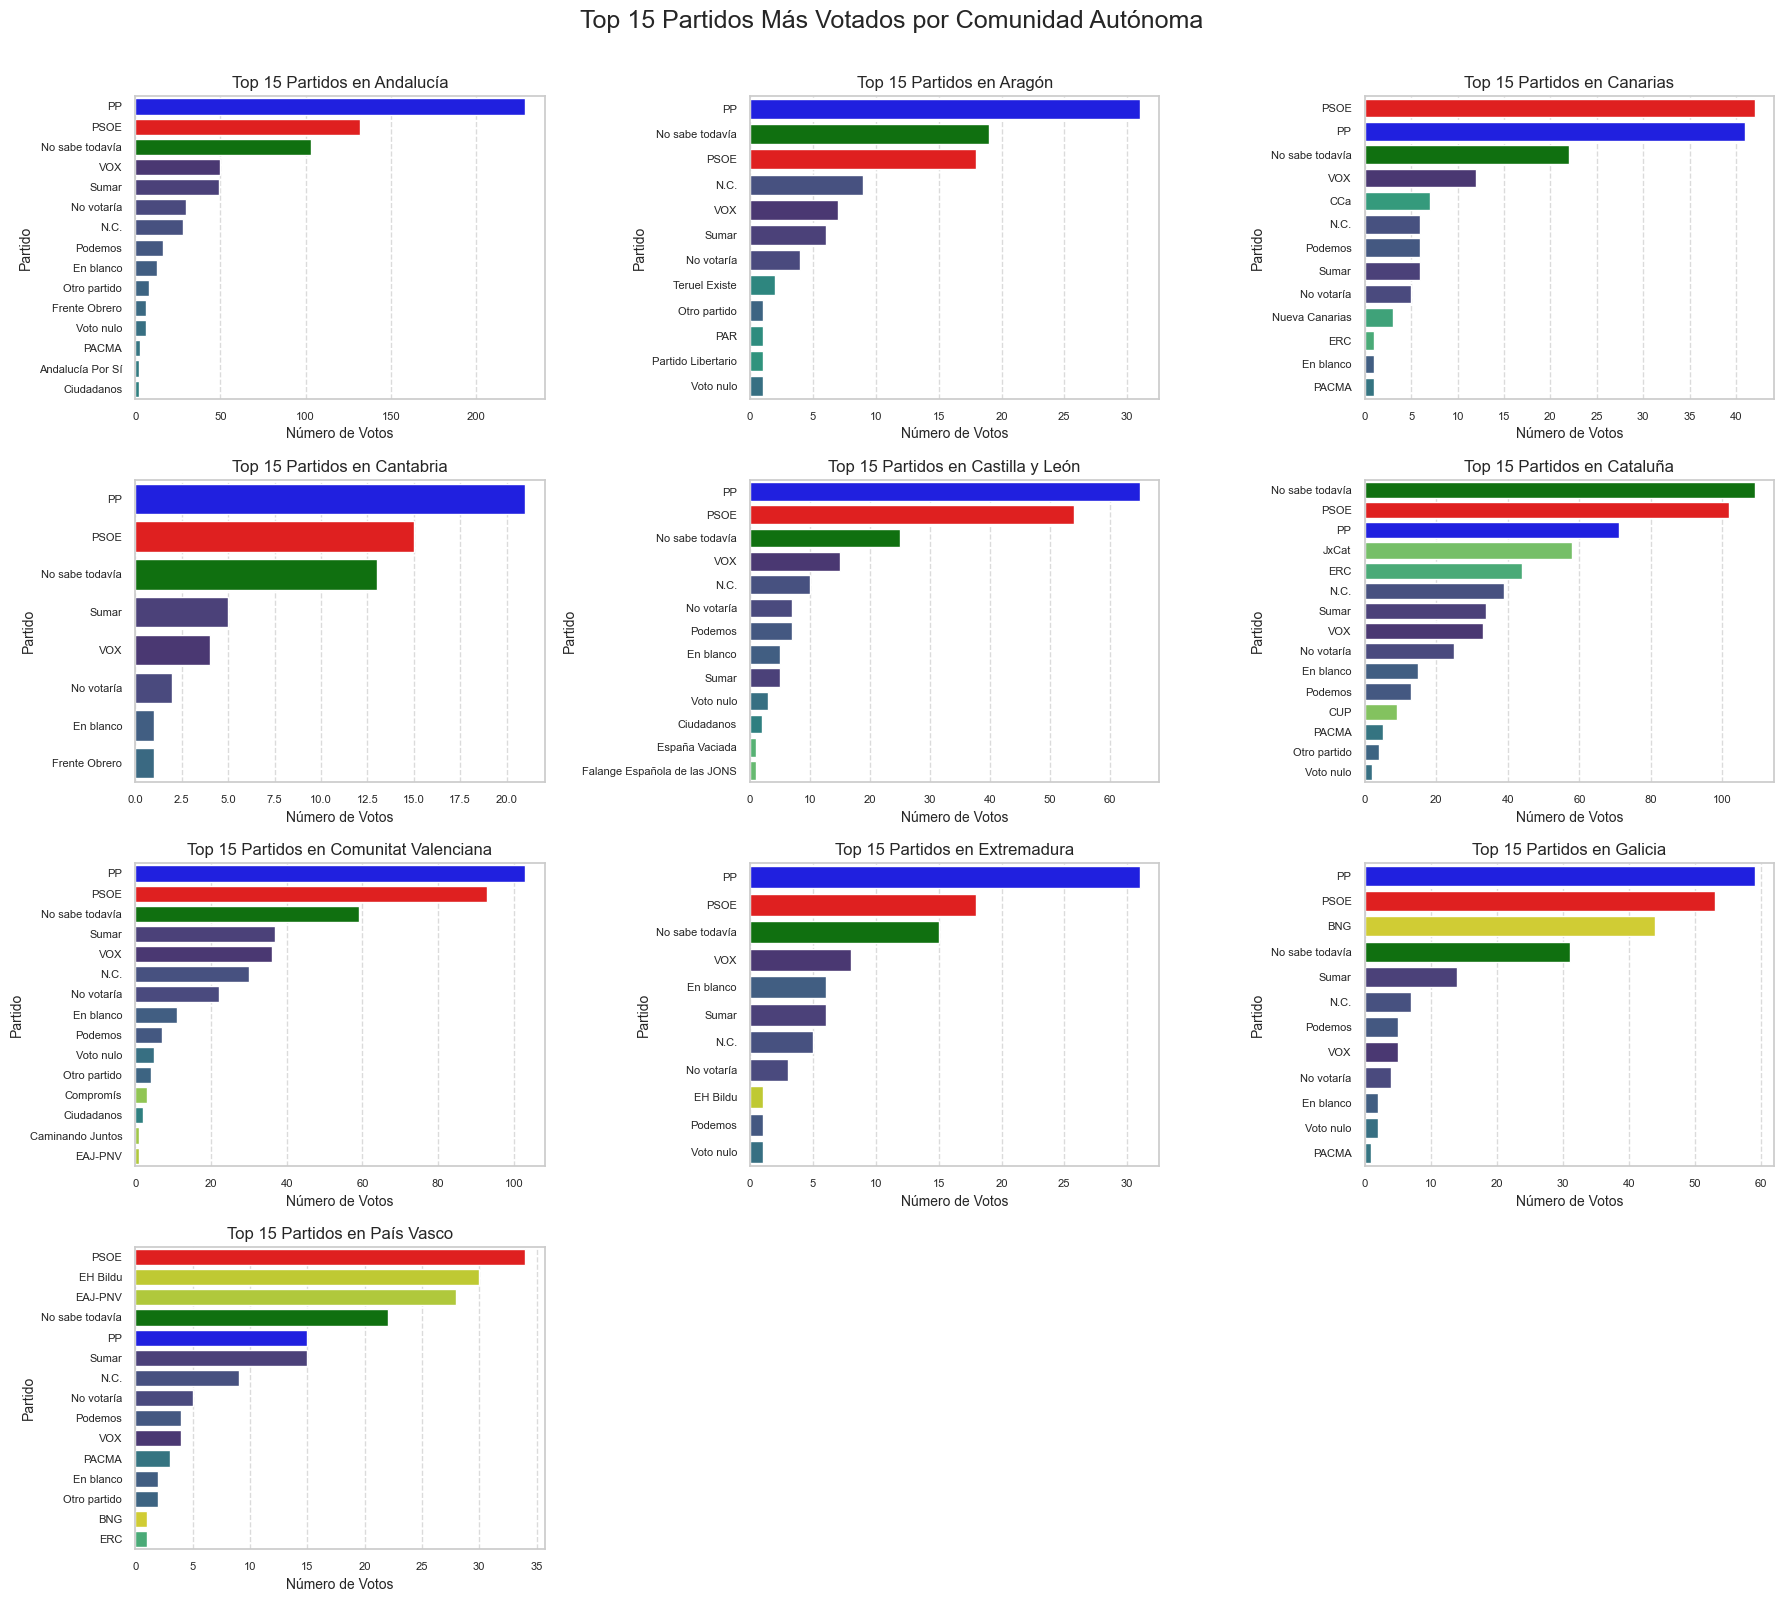

In [40]:
conteo_votos_comunidad = data.groupby(
    ['Comunidad_Autonoma', 'intencion_voto_generales']
).size().reset_index(name='Conteo_Votos')

# Definimos N para los top partidos por comunidad (ej. top 5)
N_top_partidos_comunidad = 15

# Función para obtener los top N partidos por grupo
def get_top_n_parties(df, n=N_top_partidos_comunidad, column='Conteo_Votos'):
    return df.nlargest(n, column)

# Aplicar la función de top N a cada grupo de Comunidad_Autonoma
top_partidos_por_comunidad = conteo_votos_comunidad.groupby('Comunidad_Autonoma').apply(get_top_n_parties).reset_index(drop=True)

# Obtener la lista de comunidades únicas para crear un gráfico por cada una
comunidades_unicas = top_partidos_por_comunidad['Comunidad_Autonoma'].unique()

# Configurar la cuadrícula de gráficos
num_cols = 3
num_rows = int(np.ceil(len(comunidades_unicas) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 6, num_rows * 4), sharex=False, sharey=False)
axes = axes.flatten()

# Crear una paleta de colores personalizada
all_parties_in_data = top_partidos_por_comunidad['intencion_voto_generales'].unique()
base_palette_colors = sns.color_palette('viridis', n_colors=len(all_parties_in_data))
# FIX: Changed 'all_top_parties' to 'all_parties_in_data' to correctly initialize the color map
party_color_map = dict(zip(all_parties_in_data, base_palette_colors))

if 'PSOE' in party_color_map:
    party_color_map['PSOE'] = 'red'
if 'PP' in party_color_map:
    party_color_map['PP'] = 'blue'
if 'No sabe todavía' in party_color_map:
    party_color_map['No sabe todavía'] = 'green'
if 'N/A' in party_color_map:
    party_color_map['N/A'] = 'gray'

for i, comunidad in enumerate(comunidades_unicas):
    ax = axes[i]
    
    data_comunidad = top_partidos_por_comunidad[top_partidos_por_comunidad['Comunidad_Autonoma'] == comunidad]
    
    data_comunidad = data_comunidad.sort_values(by='Conteo_Votos', ascending=False)
    
    sns.barplot(
        x='Conteo_Votos',
        y='intencion_voto_generales',
        data=data_comunidad,
        palette=party_color_map,
        ax=ax
    )
    
    ax.set_title(f'Top {N_top_partidos_comunidad} Partidos en {comunidad}', fontsize=12)
    ax.set_xlabel('Número de Votos', fontsize=10)
    ax.set_ylabel('Partido', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle(f'Top {N_top_partidos_comunidad} Partidos Más Votados por Comunidad Autónoma', fontsize=18, y=1.0)
plt.show()


Análisis de los Top 15 Partidos Más Votados por Comunidad Autónoma

1. Introducción
El presente análisis se enfoca en la visualización de la intención de voto de los quince partidos o categorías más mencionadas en cada Comunidad Autónoma. Este nivel de granularidad extendido permite una comprensión más profunda de la diversidad del panorama político regional, incluyendo la presencia de partidos minoritarios y la relevancia de las opciones de no respuesta. Se mantienen los colores personalizados (PP: azul, PSOE: rojo, No sabe todavía: verde, N/A: gris) para facilitar la identificación visual.

2. Metodología de Visualización
Se presenta una serie de gráficos de barras, donde cada subplot corresponde a una Comunidad Autónoma. Cada gráfico muestra los quince partidos o categorías con mayor número de menciones, ordenados de forma descendente por el conteo de votos. La variable intencion_voto_generales define el partido o categoría, y el Número de Votos representa la frecuencia de menciones. A diferencia de análisis previos, se incluyen explícitamente las categorías "No sabe todavía" y "N/A" si se encuentran entre los top 15, proporcionando una visión más completa de la distribución de las respuestas.

3. Resultados y Observaciones por Comunidad Autónoma

Los gráficos revelan patrones de voto complejos y heterogéneos en las distintas Comunidades Autónomas:

Andalucía: El PP (azul) es el partido más votado con una ventaja considerable. Le sigue el PSOE (rojo), y "No sabe todavía" (verde) se mantiene como la tercera opción más mencionada. A partir del cuarto puesto, aparecen partidos como VOX, Sumar, Podemos, y otros con un número de votos significativamente menor, indicando una mayor concentración del voto en los dos partidos principales.

Aragón: El PP (azul) lidera claramente, seguido por "No sabe todavía" (verde) y el PSOE (rojo). La presencia de "N.C." (gris) en cuarto lugar es notable, indicando una proporción relevante de no contestación. Otros partidos como VOX, Sumar, Teruel Existe y el Partido Libertario tienen un apoyo menor pero visible.

Canarias: El PSOE (rojo) es el partido más votado, seguido por el PP (azul) y "No sabe todavía" (verde). VOX y Sumar tienen una presencia menor, y se observan partidos regionalistas como Nueva Canarias.

Cantabria: El PP (azul) es el partido con mayor intención de voto, seguido por el PSOE (rojo) y "No sabe todavía" (verde). VOX y Sumar también aparecen, pero con un apoyo más limitado.

Castilla y León: El PP (azul) domina la intención de voto, con el PSOE (rojo) en un distante segundo lugar y "No sabe todavía" (verde) en tercer puesto. La tabla muestra una larga cola de partidos con muy pocos votos, incluyendo Falange Española de las JONS, lo que sugiere una fragmentación del voto residual.

Cataluña: "No sabe todavía" (verde) es la opción más frecuente, lo que subraya un alto nivel de indecisión o falta de identificación partidista. El PSOE (rojo) y el PP (azul) le siguen. La lista de los 15 más votados incluye una variedad de partidos nacionalistas e independentistas como JxCat, ERC y CUP, así como Sumar y En Comú Podem, reflejando la complejidad del panorama político catalán.

Comunitat Valenciana: El PP (azul) es el partido más votado, seguido por el PSOE (rojo) y "No sabe todavía" (verde). Sumar y VOX también tienen una presencia notable, y se observa la aparición de Compromís y otros partidos con menor apoyo.

Extremadura: El PP (azul) lidera la intención de voto, seguido por el PSOE (rojo) y "No sabe todavía" (verde). Sumar y VOX tienen un apoyo menor, y la presencia de "N.C." indica también una fracción de no respuesta.

Galicia: El PP (azul) es el más votado, con el PSOE (rojo) en segundo lugar. El BNG (verde claro) se posiciona firmemente en tercer lugar, destacando la importancia del nacionalismo gallego. Sumar y VOX tienen un apoyo menor, y se observa una cola de otros partidos con votos dispersos.

País Vasco: El PSOE (rojo) es el partido con mayor intención de voto. Le siguen EH Bildu (amarillo) y EAJ-PNV (morado oscuro), ambos partidos nacionalistas vascos con un apoyo considerable. "No sabe todavía" (verde) y Sumar también tienen una presencia relevante, y la lista de los 15 más votados incluye una diversidad de formaciones políticas.

4. Discusión

La visualización de los top 15 partidos por comunidad revela varios patrones clave:

Dominio Bipartidista con Matices Regionales: En la mayoría de las Comunidades Autónomas, el PP y el PSOE mantienen las dos primeras posiciones, aunque su orden varía. Sin embargo, la granularidad ampliada muestra que en regiones como Cataluña, Galicia y País Vasco, los partidos nacionalistas o regionalistas (JxCat, ERC, CUP, BNG, EH Bildu, EAJ-PNV) tienen una presencia significativa entre los top 15, e incluso ocupan los primeros puestos en algunas de ellas, lo que subraya la importancia de las agendas locales.

Relevancia de la Indecisión y No Respuesta: La categoría "No sabe todavía" (verde) aparece consistentemente entre las primeras posiciones en varias comunidades (Andalucía, Aragón, Canarias, Cantabria, Castilla y León, Comunitat Valenciana, Extremadura), y de forma muy destacada en Cataluña. Esto indica que una parte considerable de la población no tiene una intención de voto definida en el momento de la encuesta, lo cual es un factor crítico en el análisis electoral. La categoría "N/A" (gris) también es relevante en algunas comunidades como Aragón.

Fragmentación del Voto Minoritario: Al extender la visualización a 15 partidos, se observa una "cola" de partidos con un número de votos muy bajo en la mayoría de las comunidades. Esto ilustra la fragmentación del voto más allá de las principales formaciones y el surgimiento de opciones políticas diversas, aunque con un impacto limitado a nivel individual en cada región.

Diferencias en la Polarización: Algunas comunidades muestran una mayor concentración del voto en los top 2 o 3 partidos, mientras que otras, como Cataluña y País Vasco, presentan una distribución más equitativa entre un mayor número de formaciones, reflejando una mayor complejidad y polarización.

5. Conclusión

El análisis detallado de los Top 15 partidos más votados por Comunidad Autónoma proporciona una perspectiva enriquecida sobre el panorama político subnacional en España. Se confirma la dualidad entre el predominio de los grandes partidos nacionales y la influencia sustancial de las formaciones regionalistas en sus respectivos territorios. La alta proporción de votantes indecisos o no declarados en varias comunidades es un hallazgo significativo que destaca la volatilidad electoral. Esta granularidad en la visualización es fundamental para comprender las dinámicas específicas de cada región y las complejidades inherentes al sistema político español.

Analisis N/C

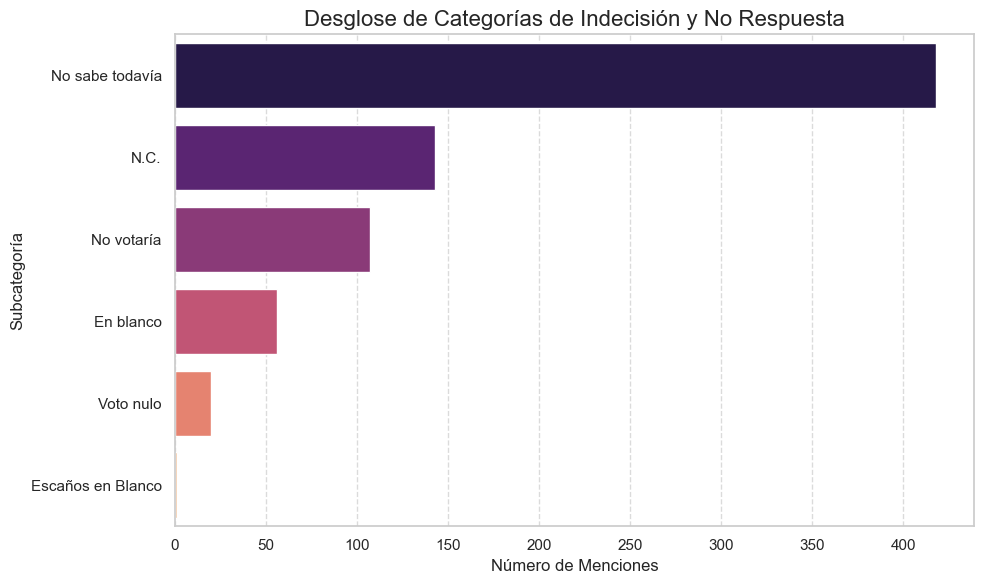


Conteo de cada subcategoría de indecisión y no respuesta:
     Subcategoria  Conteo
  No sabe todavía     418
             N.C.     143
       No votaría     107
        En blanco      56
        Voto nulo      20
Escaños en Blanco       1


In [41]:
categorias_no_respuesta = [
    'No sabe todavía',
    'N.C.',
    'Voto nulo',
    'En blanco',
    'No votaría',
    'Escaños en Blanco'
]

# Filtrar el DataFrame para incluir solo estas categorías
# Asegúrate de que 'intencion_voto_generales' sea la columna correcta en tu DataFrame 'data'
data_no_respuesta = data[data['intencion_voto_generales'].isin(categorias_no_respuesta)]

# Contar la frecuencia de cada subcategoría
conteo_subcategorias = data_no_respuesta['intencion_voto_generales'].value_counts().reset_index()
conteo_subcategorias.columns = ['Subcategoria', 'Conteo']

# Ordenar para la visualización
conteo_subcategorias = conteo_subcategorias.sort_values(by='Conteo', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Conteo',
    y='Subcategoria',
    data=conteo_subcategorias,
    palette='magma' # Puedes elegir otra paleta de colores
)

plt.title('Desglose de Categorías de Indecisión y No Respuesta', fontsize=16)
plt.xlabel('Número de Menciones', fontsize=12)
plt.ylabel('Subcategoría', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Opcional: Imprimir el conteo exacto
print("\nConteo de cada subcategoría de indecisión y no respuesta:")
print(conteo_subcategorias.to_string(index=False))


Subcategorías por comunidades

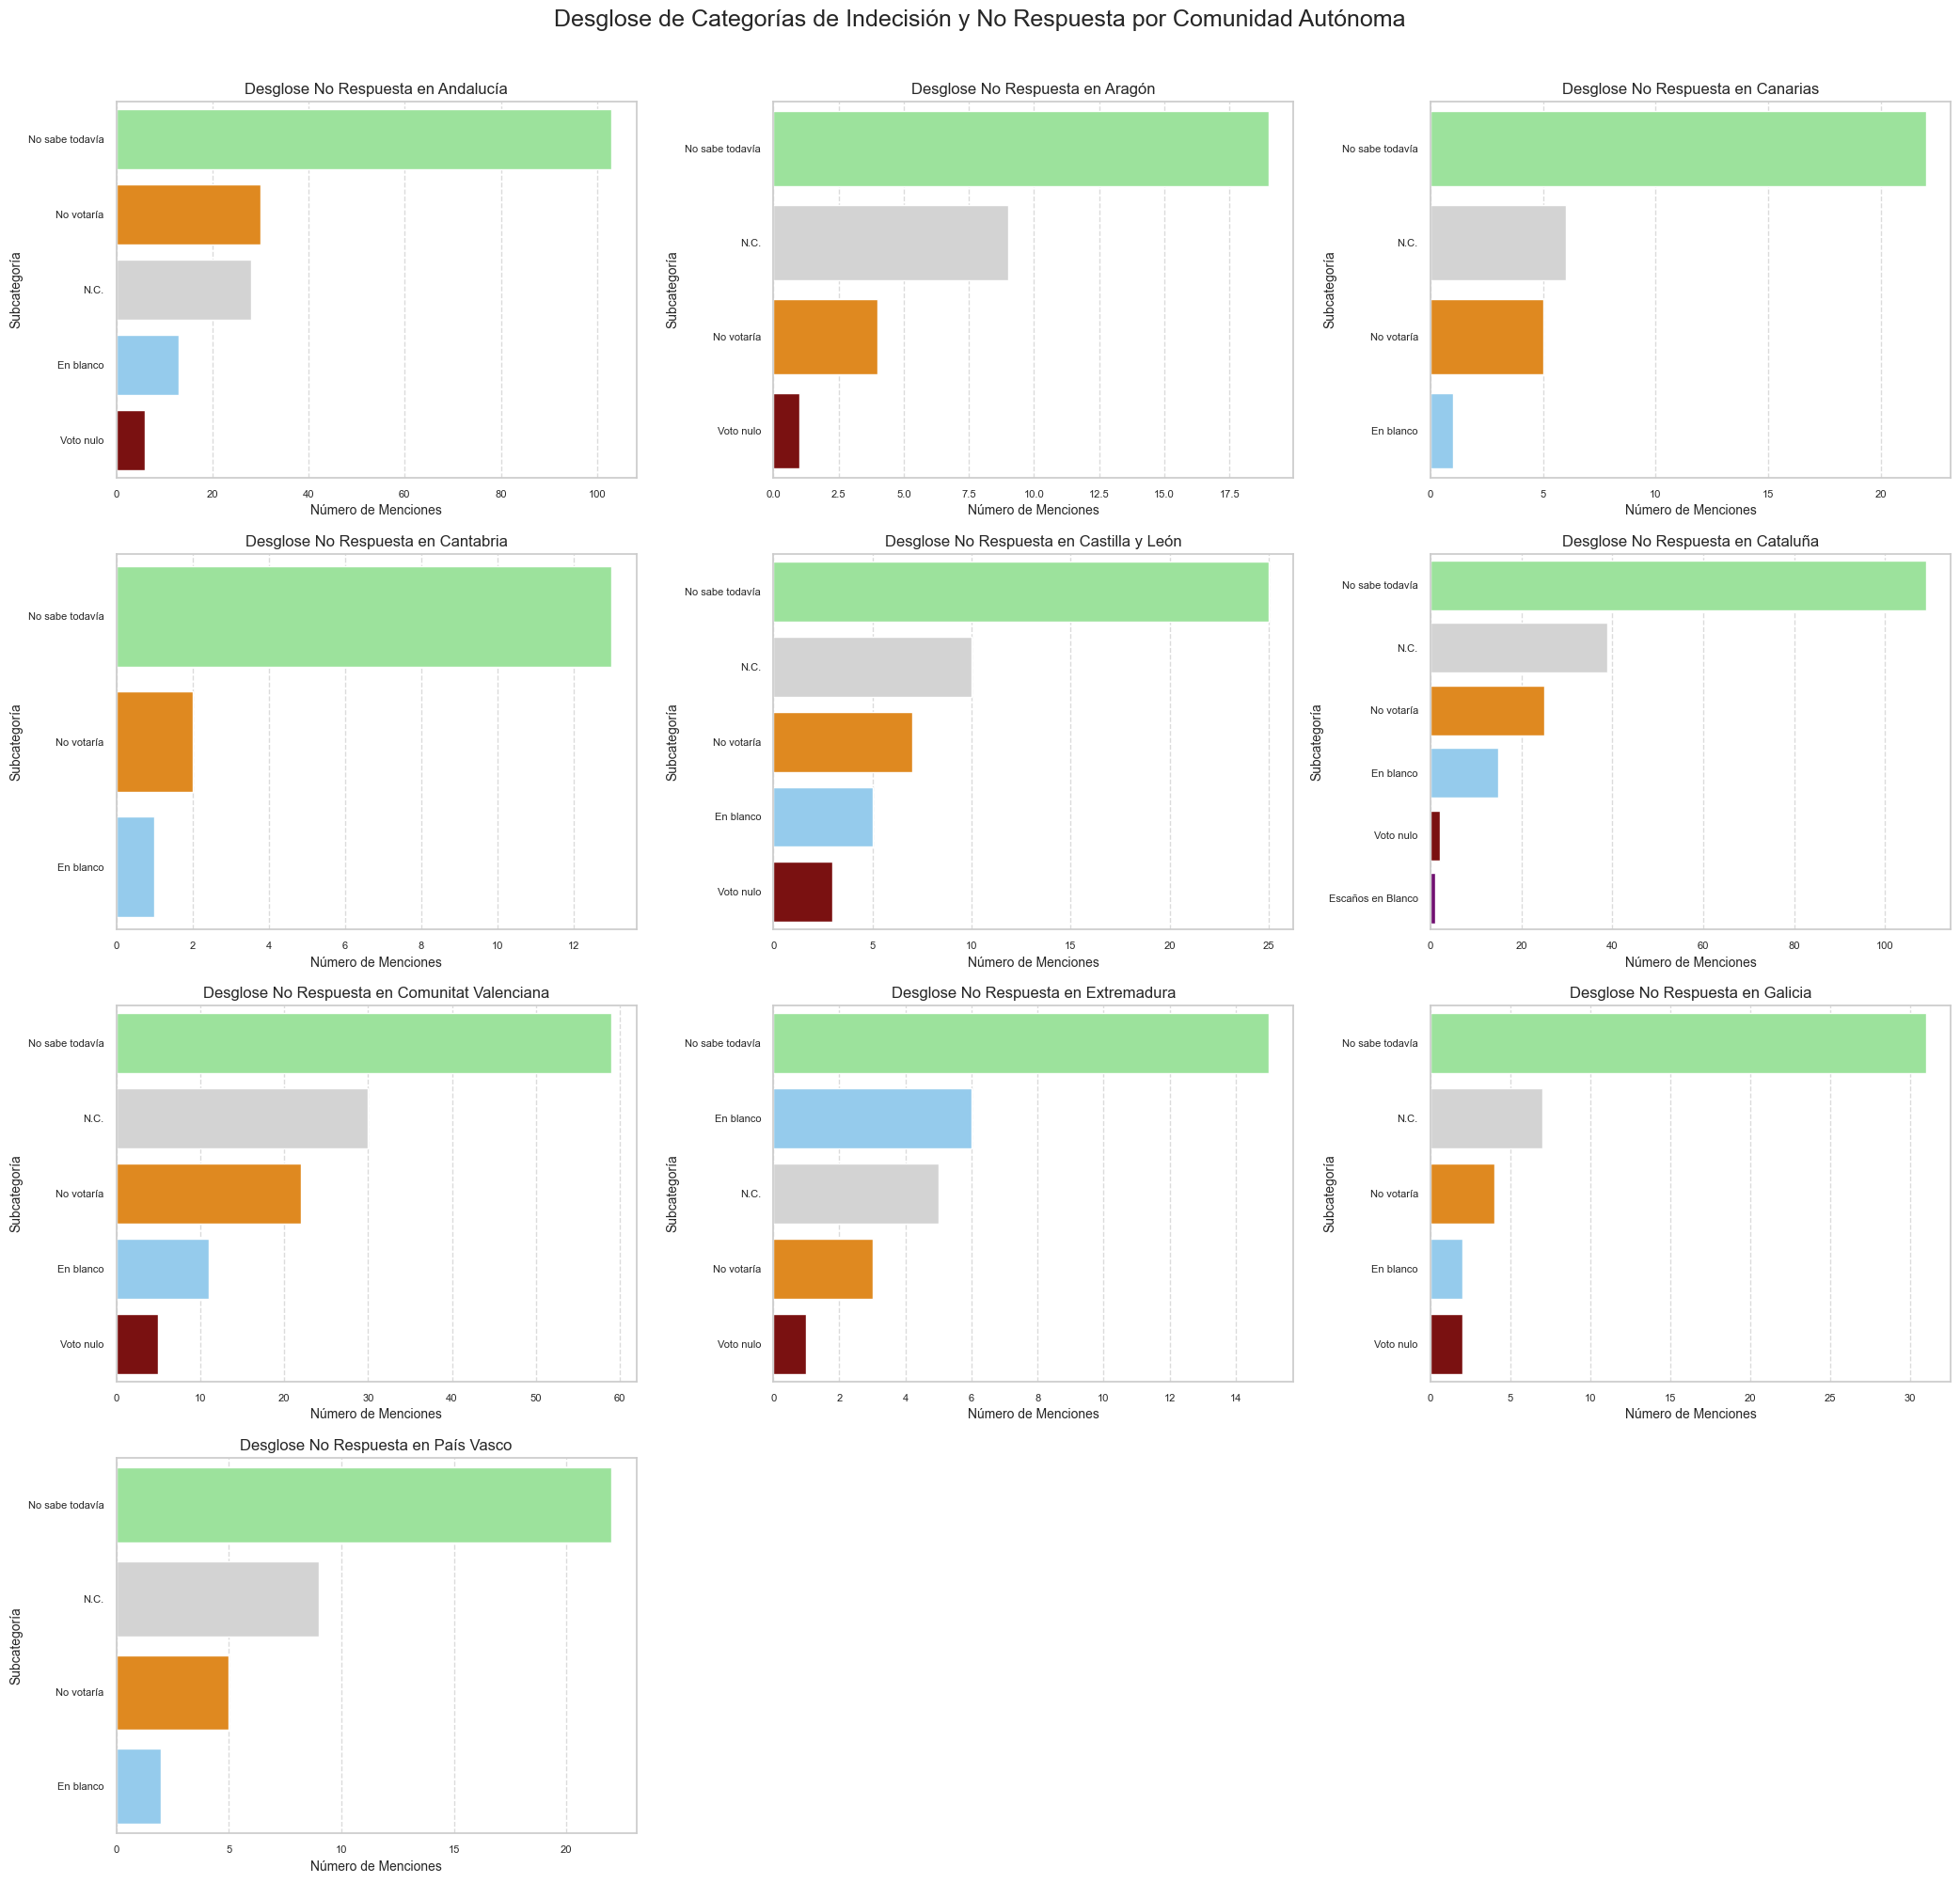


Conteo de cada subcategoría de indecisión y no respuesta por comunidad (primeras filas):
Comunidad_Autonoma intencion_voto_generales  Conteo
         Andalucía                En blanco      13
         Andalucía                     N.C.      28
         Andalucía          No sabe todavía     103
         Andalucía               No votaría      30
         Andalucía                Voto nulo       6


In [42]:
# Definir las categorías que forman parte de "indecisión y no respuesta"
categorias_no_respuesta = [
    'No sabe todavía',
    'N.C.',
    'Voto nulo',
    'En blanco',
    'No votaría',
    'Escaños en Blanco'
]

# Filtrar el DataFrame para incluir solo estas categorías
data_no_respuesta_filtrada = data[data['intencion_voto_generales'].isin(categorias_no_respuesta)]

# Contar la frecuencia de cada subcategoría por Comunidad Autónoma
conteo_subcategorias_por_comunidad = data_no_respuesta_filtrada.groupby(
    ['Comunidad_Autonoma', 'intencion_voto_generales']
).size().reset_index(name='Conteo')

# Obtener la lista de comunidades únicas
comunidades_unicas = conteo_subcategorias_por_comunidad['Comunidad_Autonoma'].unique()

# Configurar la cuadrícula de gráficos
num_cols = 3
num_rows = int(np.ceil(len(comunidades_unicas) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 7, num_rows * 5), sharex=False, sharey=False)
axes = axes.flatten()

# Definir colores específicos para cada subcategoría de no respuesta
no_respuesta_color_map = {
    'No sabe todavía': 'lightgreen',
    'N.C.': 'lightgray',
    'Voto nulo': 'darkred',
    'En blanco': 'lightskyblue',
    'No votaría': 'darkorange',
    'Escaños en Blanco': 'purple'
}

# Generar un gráfico de barras para cada comunidad
for i, comunidad in enumerate(comunidades_unicas):
    ax = axes[i]
    
    # Filtrar los datos para la comunidad actual
    data_comunidad = conteo_subcategorias_por_comunidad[conteo_subcategorias_por_comunidad['Comunidad_Autonoma'] == comunidad]
    
    # Ordenar por conteo para que las barras aparezcan ordenadas en cada gráfico
    data_comunidad = data_comunidad.sort_values(by='Conteo', ascending=False)
    
    sns.barplot(
        x='Conteo',
        y='intencion_voto_generales',
        data=data_comunidad,
        palette=no_respuesta_color_map, # Usar la paleta de colores personalizada
        ax=ax
    )
    
    ax.set_title(f'Desglose No Respuesta en {comunidad}', fontsize=12)
    ax.set_xlabel('Número de Menciones', fontsize=10)
    ax.set_ylabel('Subcategoría', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Ocultar los ejes vacíos si el número de subplots no es un múltiplo exacto
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar el layout para el título general
plt.suptitle('Desglose de Categorías de Indecisión y No Respuesta por Comunidad Autónoma', fontsize=18, y=1.0)
plt.show()

# Opcional: Imprimir el conteo exacto por comunidad (primeras filas)
print("\nConteo de cada subcategoría de indecisión y no respuesta por comunidad (primeras filas):")
print(conteo_subcategorias_por_comunidad.head().to_string(index=False))

El análisis desagregado de las categorías de indecisión y no respuesta revela que "No sabe todavía" es consistentemente la subcategoría más frecuente en todas las Comunidades Autónomas, lo que subraya la prevalencia de la indecisión como un factor clave en el electorado español. Sin embargo, la importancia relativa de otras subcategorías varía regionalmente:

Prevalencia de la Indecisión: La alta frecuencia de "No sabe todavía" en todas las regiones, y particularmente en Cataluña, indica un segmento significativo de votantes cuyo comportamiento electoral es aún maleable y susceptible a influencias de última hora.

Importancia de la No Contestación Explícita: La categoría "N.C." (No Contesta) es la segunda más común en varias comunidades como Andalucía, Aragón, Canarias, Cantabria, Castilla y León, Comunidad Valenciana, Galicia y País Vasco, lo que sugiere una fracción de la población que opta por no revelar su intención de voto, ya sea por privacidad o por falta de interés en la encuesta.

Voto de Protesta y Rechazo: Las opciones "En blanco" y "Voto nulo" son menos frecuentes que la indecisión o la no contestación, pero su presencia es notable en comunidades como Castilla y León, Cataluña y Extremadura. Esto indica un segmento del electorado que, en lugar de abstenerse o no responder, utiliza el voto no válido como una forma de expresar descontento o rechazo al sistema político o a la oferta partidista. La presencia de "Escaños en Blanco" en Cataluña también apunta a una forma organizada de voto de protesta.

Abstención Declarada: La categoría "No votaría" es relevante en varias comunidades, como Andalucía, Aragón, Canarias, Cantabria, Comunidad Valenciana, Galicia y País Vasco, representando a aquellos que expresan explícitamente su intención de no participar en las elecciones.

Reagrupación de categorías

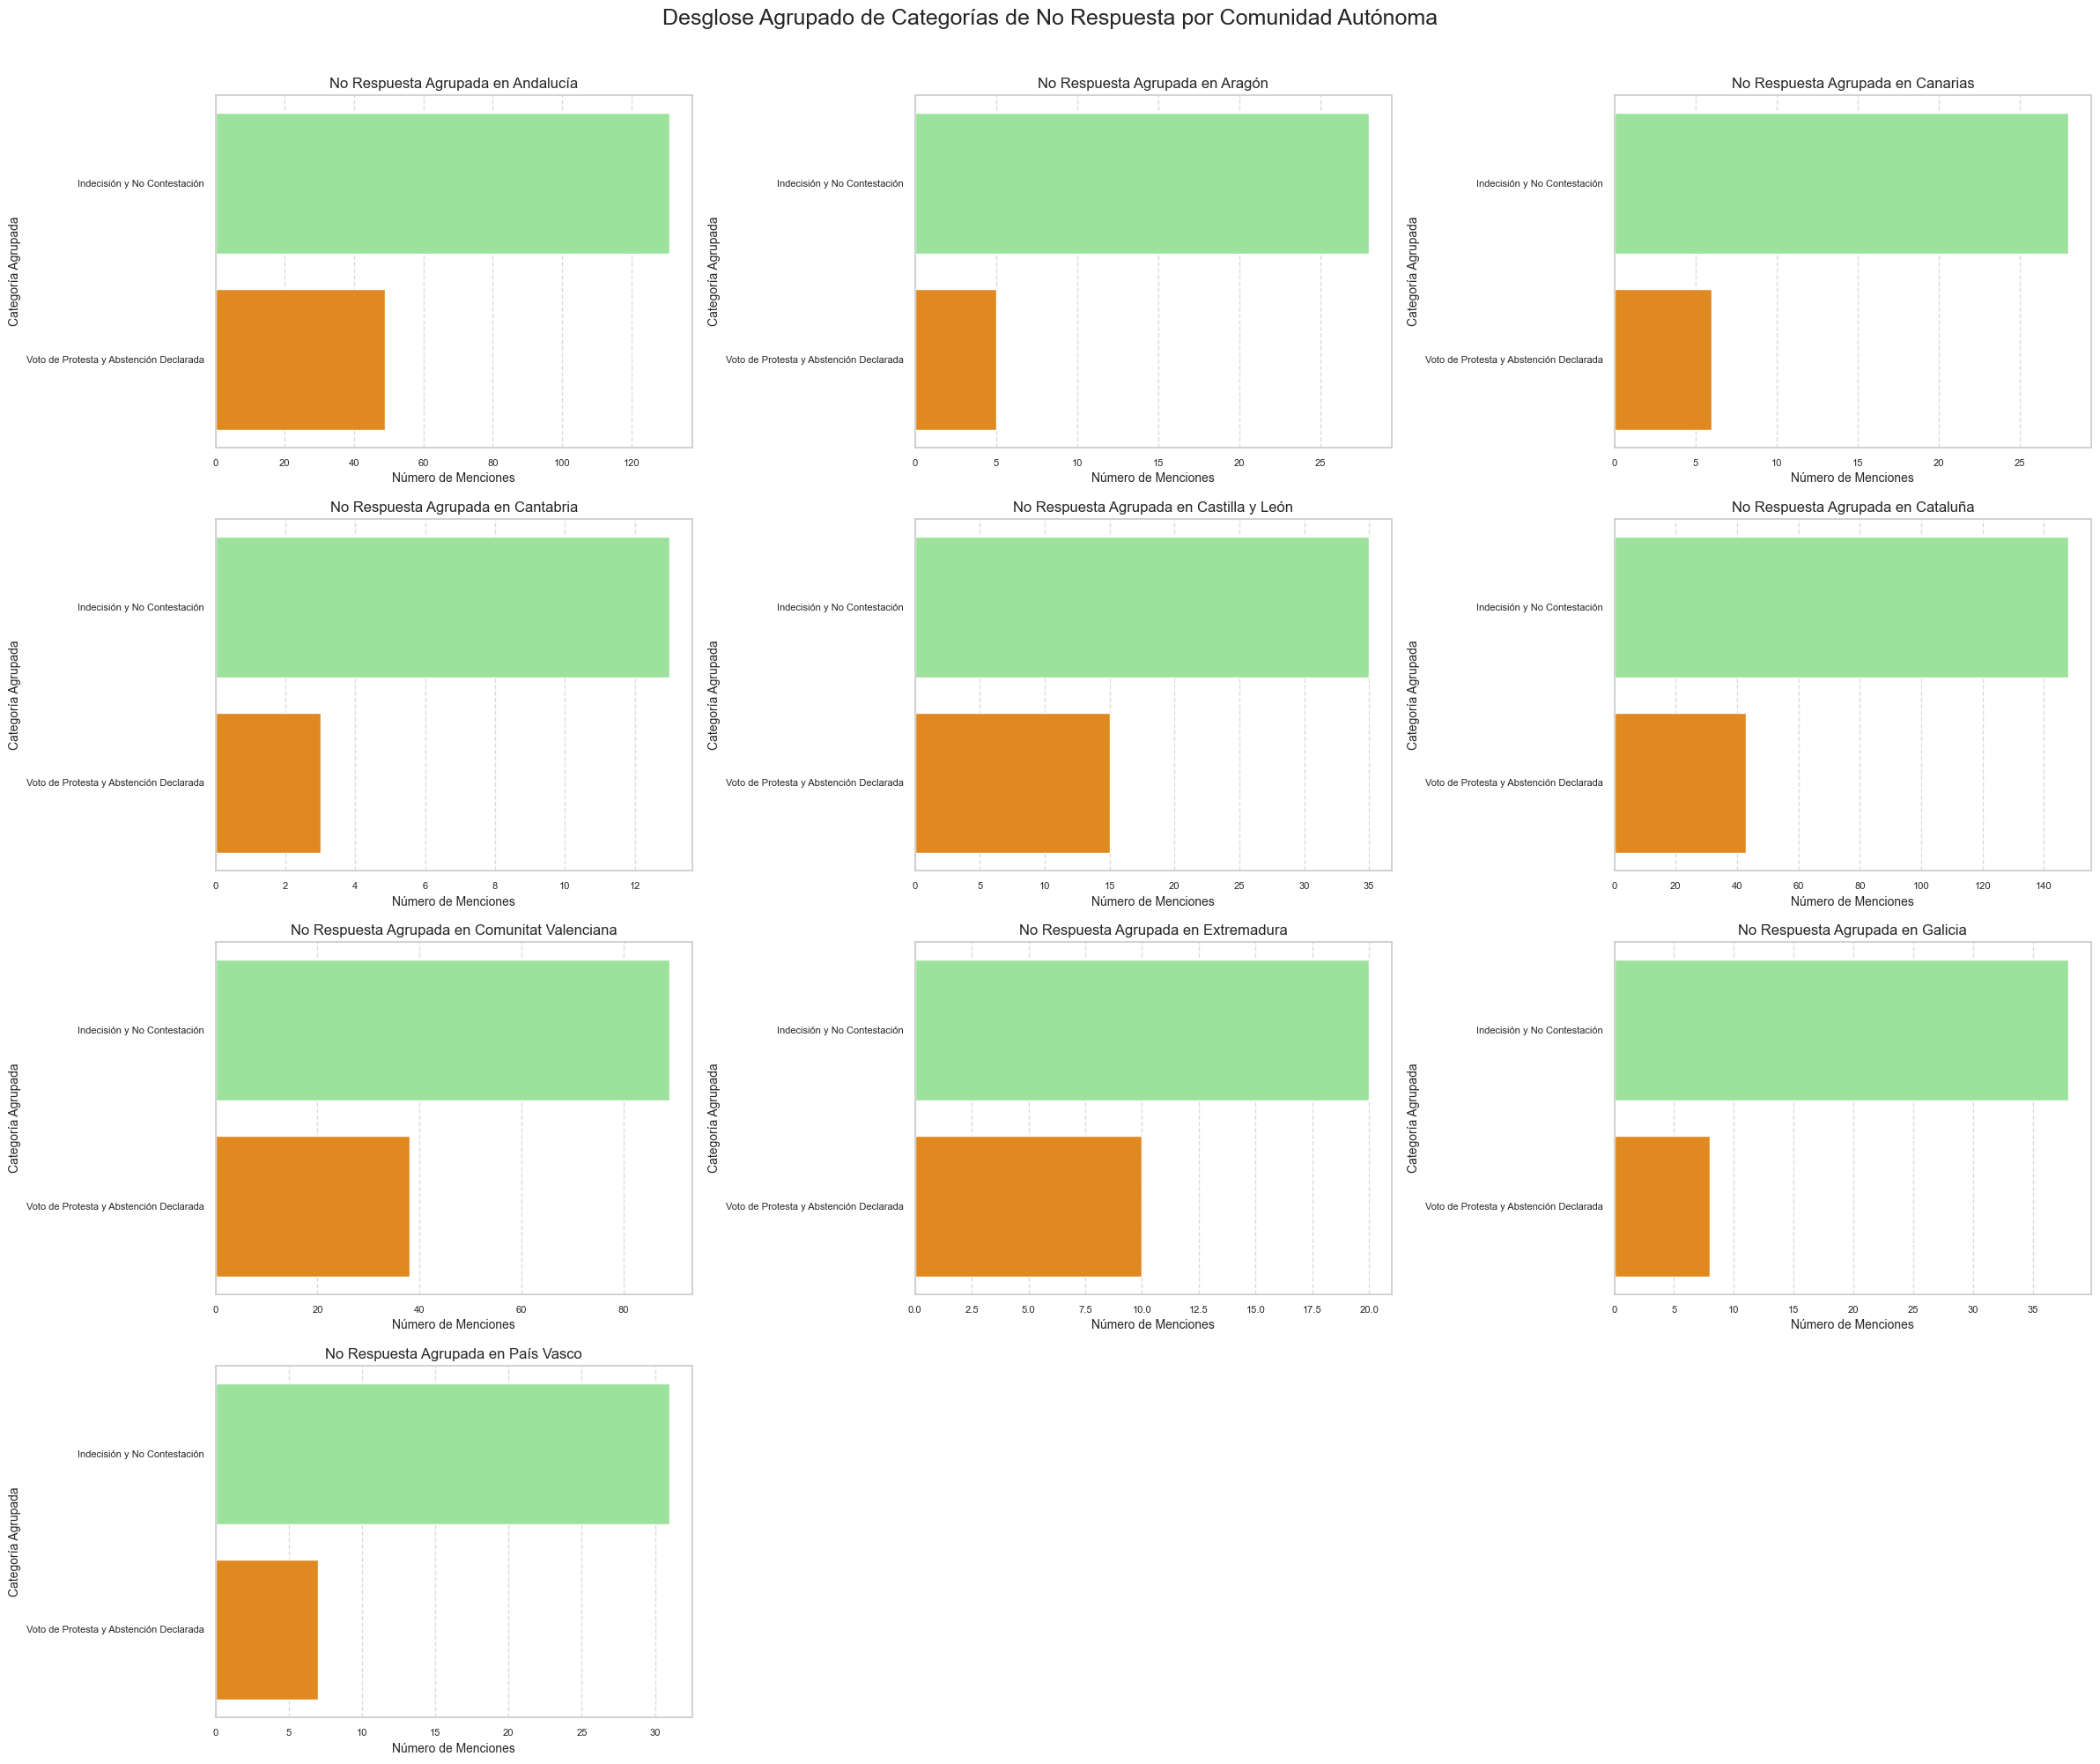


Conteo de cada categoría agrupada de no respuesta por comunidad (primeras filas):
Comunidad_Autonoma                      categoria_agrupada  Conteo
         Andalucía            Indecisión y No Contestación     131
         Andalucía Voto de Protesta y Abstención Declarada      49
            Aragón            Indecisión y No Contestación      28
            Aragón Voto de Protesta y Abstención Declarada       5
          Canarias            Indecisión y No Contestación      28


In [43]:
#Definir las categorías originales que forman parte de "indecisión y no respuesta"
categorias_no_respuesta_originales = [
    'No sabe todavía',
    'N.C.',
    'Voto nulo',
    'En blanco',
    'No votaría',
    'Escaños en Blanco'
]

# Filtrar el DataFrame para incluir solo estas categorías
data_no_respuesta_filtrada = data[data['intencion_voto_generales'].isin(categorias_no_respuesta_originales)].copy()

# Crear la nueva columna con las categorías agrupadas
data_no_respuesta_filtrada['categoria_agrupada'] = data_no_respuesta_filtrada['intencion_voto_generales'].map({
    'No sabe todavía': 'Indecisión y No Contestación',
    'N.C.': 'Indecisión y No Contestación',
    'No votaría': 'Voto de Protesta y Abstención Declarada',
    'En blanco': 'Voto de Protesta y Abstención Declarada',
    'Voto nulo': 'Voto de Protesta y Abstención Declarada',
    'Escaños en Blanco': 'Voto de Protesta y Abstención Declarada'
})

# Contar la frecuencia de las categorías agrupadas por Comunidad Autónoma
conteo_agrupado_por_comunidad = data_no_respuesta_filtrada.groupby(
    ['Comunidad_Autonoma', 'categoria_agrupada']
).size().reset_index(name='Conteo')

# Obtener la lista de comunidades únicas
comunidades_unicas = conteo_agrupado_por_comunidad['Comunidad_Autonoma'].unique()

# Configurar la cuadrícula de gráficos
num_cols = 3
num_rows = int(np.ceil(len(comunidades_unicas) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 8, num_rows * 5), sharex=False, sharey=False)
axes = axes.flatten()

# Definir colores específicos para las categorías agrupadas
colores_agrupados = {
    'Indecisión y No Contestación': 'lightgreen',
    'Voto de Protesta y Abstención Declarada': 'darkorange' # Un color para todo este grupo
}

# Generar un gráfico de barras para cada comunidad
for i, comunidad in enumerate(comunidades_unicas):
    ax = axes[i]
    
    # Filtrar los datos para la comunidad actual
    data_comunidad_agrupada = conteo_agrupado_por_comunidad[conteo_agrupado_por_comunidad['Comunidad_Autonoma'] == comunidad]
    
    # Ordenar por conteo para que las barras aparezcan ordenadas en cada gráfico
    data_comunidad_agrupada = data_comunidad_agrupada.sort_values(by='Conteo', ascending=False)
    
    sns.barplot(
        x='Conteo',
        y='categoria_agrupada',
        data=data_comunidad_agrupada,
        palette=colores_agrupados, # Usar la paleta de colores para las categorías agrupadas
        ax=ax
    )
    
    ax.set_title(f'No Respuesta Agrupada en {comunidad}', fontsize=12)
    ax.set_xlabel('Número de Menciones', fontsize=10)
    ax.set_ylabel('Categoría Agrupada', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Ocultar los ejes vacíos si el número de subplots no es un múltiplo exacto
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Desglose Agrupado de Categorías de No Respuesta por Comunidad Autónoma', fontsize=18, y=1.0)
plt.show()

# Opcional: Imprimir el conteo exacto por comunidad (primeras filas)
print("\nConteo de cada categoría agrupada de no respuesta por comunidad (primeras filas):")
print(conteo_agrupado_por_comunidad.head().to_string(index=False))


Resultados y Observaciones por Comunidad Autónoma

Los gráficos revelan una clara predominancia de la "Indecisión y No Contestación" sobre el "Voto de Protesta y Abstención Declarada" en todas las Comunidades Autónomas analizadas.

Dominio de la Indecisión y No Contestación: En todas las regiones, la barra verde claro ("Indecisión y No Contestación") es significativamente más larga que la barra naranja oscuro ("Voto de Protesta y Abstención Declarada"). Esto indica que la forma principal de no respuesta en el electorado se manifiesta como una falta de decisión o una reticencia a contestar, más que como una expresión activa de protesta o una declaración explícita de abstención.

Variaciones en la Magnitud Absoluta:

Comunidades como Andalucía y Cataluña presentan los volúmenes absolutos más altos de "Indecisión y No Contestación", superando las 100 menciones en Cataluña. Esto sugiere un mayor número de votantes indecisos o no contestatarios en estas regiones, lo que podría estar relacionado con su mayor tamaño poblacional o con dinámicas políticas específicas.

En contraste, comunidades como Cantabria, Extremadura y País Vasco muestran volúmenes absolutos menores para ambas categorías, lo cual puede reflejar poblaciones más pequeñas o una mayor polarización/decisión en su electorado.

Consistencia en la Proporción Relativa: A pesar de las variaciones en la magnitud absoluta, la proporción relativa entre "Indecisión y No Contestación" y "Voto de Protesta y Abstención Declarada" se mantiene notablemente consistente en la mayoría de las comunidades. La "Indecisión y No Contestación" siempre supera con creces al "Voto de Protesta y Abstención Declarada", lo que sugiere un patrón generalizado de comportamiento de no respuesta.

4. Discusión

La clara preponderancia de la "Indecisión y No Contestación" sobre el "Voto de Protesta y Abstención Declarada" en todas las Comunidades Autónomas es un hallazgo robusto. Esto implica que la mayor parte del electorado que no se alinea directamente con un partido en el momento de la encuesta se encuentra en un estado de indecisión o reserva, en lugar de expresar un rechazo activo al sistema o una intención explícita de no votar.

Este patrón tiene implicaciones significativas:

Potencial de Movilización: El gran volumen de "Indecisión y No Contestación" representa una bolsa de votos considerablemente influyente. Estos votantes son el objetivo principal de las campañas electorales, ya que su decisión final puede alterar sustancialmente los resultados.

Naturaleza de la Incertidumbre Electoral: La incertidumbre en el panorama político español parece derivar más de la falta de una decisión consolidada o de la reticencia a declararla, que de un movimiento masivo hacia el voto en blanco, nulo o la abstención activa.

Estrategias Partidistas: Los partidos políticos deben enfocar sus estrategias no solo en consolidar el voto de sus bases, sino también en persuadir a este amplio segmento de indecisos y no contestatarios.

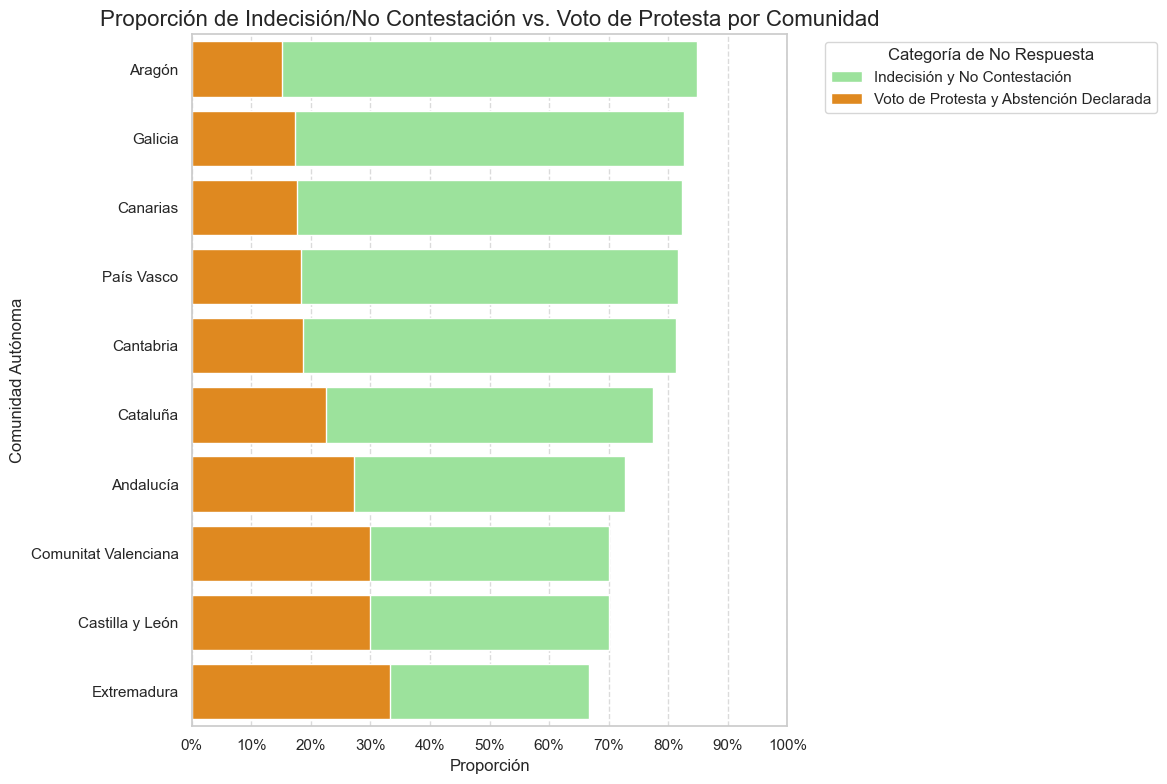

In [44]:
# Definir las categorías originales que forman parte de "indecisión y no respuesta"
categorias_no_respuesta_originales = [
    'No sabe todavía',
    'N.C.',
    'Voto nulo',
    'En blanco',
    'No votaría',
    'Escaños en Blanco'
]

# Filtrar el DataFrame para incluir solo estas categorías
data_no_respuesta_filtrada = data[data['intencion_voto_generales'].isin(categorias_no_respuesta_originales)].copy()

# Crear la nueva columna con las categorías agrupadas
data_no_respuesta_filtrada['categoria_agrupada'] = data_no_respuesta_filtrada['intencion_voto_generales'].map({
    'No sabe todavía': 'Indecisión y No Contestación',
    'N.C.': 'Indecisión y No Contestación',
    'No votaría': 'Voto de Protesta y Abstención Declarada',
    'En blanco': 'Voto de Protesta y Abstención Declarada',
    'Voto nulo': 'Voto de Protesta y Abstención Declarada',
    'Escaños en Blanco': 'Voto de Protesta y Abstención Declarada'
})

# Calcular el conteo de las categorías agrupadas por Comunidad Autónoma
conteo_agrupado_por_comunidad = data_no_respuesta_filtrada.groupby(
    ['Comunidad_Autonoma', 'categoria_agrupada']
).size().reset_index(name='Conteo')

# Calcular el total de no respuesta por comunidad
total_no_respuesta_por_comunidad = conteo_agrupado_por_comunidad.groupby('Comunidad_Autonoma')['Conteo'].sum().reset_index(name='Total_No_Respuesta')

# Unir el conteo agrupado con el total para calcular las proporciones
conteo_agrupado_por_comunidad = pd.merge(
    conteo_agrupado_por_comunidad,
    total_no_respuesta_por_comunidad,
    on='Comunidad_Autonoma'
)

# Calcular la proporción
conteo_agrupado_por_comunidad['Proporcion'] = conteo_agrupado_por_comunidad['Conteo'] / conteo_agrupado_por_comunidad['Total_No_Respuesta']

# Ordenar las comunidades por la proporción de "Indecisión y No Contestación" para una mejor visualización
# Esto asegura que las comunidades con más indecisión aparezcan arriba
orden_comunidades = conteo_agrupado_por_comunidad[
    conteo_agrupado_por_comunidad['categoria_agrupada'] == 'Indecisión y No Contestación'
].sort_values(by='Proporcion', ascending=False)['Comunidad_Autonoma'].tolist()

# Definir colores específicos para las categorías agrupadas
colores_agrupados = {
    'Indecisión y No Contestación': 'lightgreen',
    'Voto de Protesta y Abstención Declarada': 'darkorange'
}

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Proporcion',
    y='Comunidad_Autonoma',
    hue='categoria_agrupada',
    data=conteo_agrupado_por_comunidad,
    palette=colores_agrupados,
    order=orden_comunidades, # Aplicar el orden personalizado
    dodge=False, # Esto es crucial para un gráfico de barras apiladas al 100%
)

plt.title('Proporción de Indecisión/No Contestación vs. Voto de Protesta por Comunidad', fontsize=16)
plt.xlabel('Proporción', fontsize=12)
plt.ylabel('Comunidad Autónoma', fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1), [f'{x*100:.0f}%' for x in np.arange(0, 1.1, 0.1)]) # Formato de porcentaje
plt.legend(title='Categoría de No Respuesta', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conclusión sobre las Proporciones de Indecisión y Voto de Protesta por Comunidad Autónoma

El análisis de las proporciones de "Indecisión y No Contestación" versus "Voto de Protesta y Abstención Declarada" en la intención de voto, desagregado por Comunidad Autónoma, revela patrones muy importantes para la comprensión del comportamiento electoral no partidista.

Los datos demuestran una prevalencia sistemática de la "Indecisión y No Contestación" en todas las Comunidades Autónomas. Este hallazgo sugiere que la forma dominante de no-alineación partidista en el electorado español es la falta de una decisión consolidada o la reticencia a declarar una preferencia, más que una manifestación activa de rechazo. La alta proporción de esta categoría subraya la fluidez y el potencial de volatilidad en el comportamiento electoral, indicando que un segmento considerable de votantes mantiene su opción abierta hasta fases avanzadas del ciclo electoral.

Aunque en menor proporción, el "Voto de Protesta y Abstención Declarada" está consistentemente presente en todas las regiones. Esto confirma la existencia de un componente del electorado que, mediante el voto nulo, en blanco o la declaración de no participación, expresa un descontento activo o una crítica explícita al sistema político o a la oferta partidista. La variabilidad en la proporción de esta categoría entre comunidades, aunque sutil, puede señalar diferencias en los niveles de polarización o en la percepción de la eficacia del voto tradicional.

En síntesis, la distinción entre estas dos macro-categorías de no respuesta es fundamental. Permite diferenciar entre un electorado que aún está en proceso de deliberación y otro que ya ha manifestado una forma de rechazo o protesta. Esta comprensión matizada es indispensable para la formulación de estrategias políticas adaptadas a las realidades regionales y para futuras investigaciones sobre las dinámicas del voto no partidista en contextos democráticos.

Conclusión Final:

La decisión de consolidar las categorías de "Indecisión y No Contestación" y "Voto de Protesta y Abstención Declarada" en una única "Categoría 0" para fines de modelado y análisis macro responde a una serie de consideraciones metodológicas y objetivos analíticos específicos. Si bien reconocemos la heterogeneidad intrínseca de las motivaciones subyacentes a estas formas de no-respuesta, la unificación puede ser una estrategia analíticamente sólida bajo ciertas premisas.

2. Racionalidad Metodológica de la Unificación

La integración de diversas expresiones de no-respuesta en una "Categoría 0" se justifica por los siguientes argumentos:

Simplificación para Modelos Predictivos Binaros o Multiclasificación Simplificada: 
- Cuando el objetivo primordial de un modelo es predecir la presencia o ausencia de una intención de voto partidista explícita, la distinción entre las subcategorías de no respuesta puede ser excesivamente granular. 
- Unificar estas categorías permite construir un modelo de clasificación binaria (e.g., "Vota Partido" vs. "No Vota Partido/Indeciso") o un modelo multiclasificación con un número reducido de clases, mejorando la eficiencia computacional y la interpretabilidad del resultado primario: la propensión a alinearse con un partido.

Cuantificación del Segmento No Alineado: 
- La "Categoría 0" proporciona una métrica agregada y concisa del volumen total de individuos que no expresan una preferencia partidista directa en el momento de la encuesta. Esto es significativo para análisis macro-electorales que buscan estimar el tamaño del "voto flotante", el "electorado desafeccionado" o el "segmento indeciso" en su conjunto, sin necesidad de profundizar en las motivaciones específicas de cada subgrupo.

Reducción de Ruido y Mejora de la Estabilidad del Modelo: 
- En algunos contextos de modelado, la distinción entre categorías muy similares o con frecuencias bajas dentro de la "no respuesta" podría introducir ruido o inestabilidad en el modelo, especialmente si las diferencias predictivas entre ellas son marginales. La unificación puede mejorar la robustez y generalizavión del modelo al centrarse en la distinción más fundamental: la existencia de una preferencia partidista declarada.

Enfoque en el Comportamiento Observable: 
- Desde una perspectiva conductista, todas estas categorías (indecisión, no contestación, voto en blanco, voto nulo, etc.) convergen en un resultado observable: la ausencia de un voto directo por un partido político específico. Para modelos que buscan predecir este comportamiento final, la unificación es una abstracción válida.

3. Implicaciones y Limitaciones 

Si bien la unificación ofrece ventajas para ciertos objetivos analíticos, es imperativo reconocer sus implicacias y limitaciones:
- Pérdida de Nuance Motivacional. La principal limitación es la pérdida de la riqueza interpretativa sobre las motivaciones subyacentes. La "indecisión" implica un potencial de movilización, mientras que el "voto de protesta" sugiere un descontento activo. La "Categoría 0" no permite diferenciar estas dinámicas, lo que restringe el análisis cualitativo y estratégico posterior.

Homogeneización de Comportamientos Heterogéneos: 
- Al tratar comportamientos cualitativamente distintos como equivalentes, se asume que las variables predictoras influyen de manera similar en todas las subcategorías agrupadas, lo cual puede no ser cierto.

Contexto del Objetivo del Modelo: 
- Esta decisión es óptima cuando el objetivo primario del modelado es la clasificación entre "votante partidista" y "no votante partidista/indeciso". Para investigaciones que busquen comprender las causas y consecuencias de la desafección política o la abstención activa, una desagregación más fina sería indispensable.



La decisión de unificar las categorías de "Indecisión y No Contestación" y "Voto de Protesta y Abstención Declarada" en una única "Categoría 0" para propósitos de modelado es una elección metodológica pragmática y académicamente justificable cuando el objetivo principal es la predicción o cuantificación agregada del segmento del electorado que no expresa una intención de voto partidista directa. Esta aproximación simplifica el problema de modelado y facilita la interpretación a un nivel macro, proporcionando una métrica clara del volumen de no-alineación. No obstante, es fundamental que los investigadores sean conscientes de la pérdida de la granularidad motivacional que esta unificación conlleva, y que consideren la desagregación de estas categorías para análisis cualitativos o cuando el objetivo de investigación requiera una comprensión más profunda de las causas específicas de la no respuesta electoral.

In [45]:
# Limpiar espacios en la columna 'nivel_educacion' 
data['nivel_educacion'] = data['nivel_educacion'].astype(str).str.strip()

# Definir el mapeo de agrupación y los valores a NaN
mapeo_nivel_educacion = {
    'Menos de 5 años de escolarización o primaria incompleta': 'Educación Básica',
    'Educación Primaria (Educación Primaria de LOGSE, 5º curso de EGB, enseñanza primaria antigua)': 'Educación Básica',
    'Educación secundaria (ESO, EGB. Graduado Escolar. Certificado de Escolaridad, Bachillerato Elemental)': 'Educación Básica',
    'F.P. Básica (FPB), cualificación profesional grado inicial (FP grado inicial). PCPI (Programas de Cualificación Profesional Inicial, que no precisan de titulación académica de la primera etapa de secundaria para su realización). Programas de garantía social': 'Educación Básica',

    'Bachillerato (Bachillerato LOGSE, BUP, Bachillerato Superior (6º), Bachillerato Universitario (7º), incluidos COU y PREU)': 'Bachillerato/FP Media',
    'FP de Grado Medio (ciclo/módulo formativo de FP (grado medio), de Artes Plásticas y Diseño, Música y Danza, enseñanzas deportivas, FP I, Bachiller Laboral Elemental. Oficialía Industrial; Bachillerato Comercial)': 'Bachillerato/FP Media',

    'FP de Grado Superior (ciclo/módulo formativo de FP (grado superior) de Artes Plásticas, Diseño, Música y Danza, Deporte, FP II, Bachillerato Laboral Superior, Maestría industrial, perito/a mercantil; Secretariado de 2º grado; Grado Medio conservatorio)': 'FP Superior',

    'Diplomatura (ATENCIÓN: sólo diplomaturas oficiales, no codificar aquí los tres primeros años de una licenciatura o grado con mayor duración)': 'Grado/Diplomatura',
    'Grado (estudios de grado, enseñanzas artísticas equivalentes (desde 2006))': 'Grado/Diplomatura',

    'Licenciatura (titulaciones con equivalencia oficial: 2º ciclo INEF; Danza y Arte Dramático (desde 1992); Grado Superior de Música)': 'Postgrado/Universitario Alto',
    'Arquitectura/Ingeniería Técnica (aparejador/a; peritos/as)': 'Postgrado/Universitario Alto',
    'Arquitectura/Ingeniería': 'Postgrado/Universitario Alto',
    'Máster oficial universitario (especialidades médicas o equivalente)': 'Postgrado/Universitario Alto',
    'Títulos propios de posgrado (máster no oficial, etc.)': 'Postgrado/Universitario Alto',
    'Doctorado': 'Postgrado/Universitario Alto',

    'N.P.': pd.NA,
    'N.S./No recuerda': pd.NA
}

In [50]:
data['nivel_educacion_agrupado'] = data['nivel_educacion'].replace(mapeo_nivel_educacion)

In [53]:
tabla_educ_voto = pd.crosstab(data['nivel_educacion_agrupado'], data['intencion_voto_generales'], normalize='index')
print(tabla_educ_voto)


intencion_voto_generales      Adelante Andalucía  Andalucía Por Sí       BNG  \
nivel_educacion_agrupado                                                       
Bachillerato/FP Media                   0.001815          0.000000  0.012704   
Educación Básica                        0.000000          0.002433  0.004866   
FP Superior                             0.000000          0.000000  0.024390   
Grado/Diplomatura                       0.000000          0.000000  0.019830   
Postgrado/Universitario Alto            0.000000          0.001019  0.021407   

intencion_voto_generales           CCa       CUP  Caminando Juntos  \
nivel_educacion_agrupado                                             
Bachillerato/FP Media         0.005445  0.003630           0.00000   
Educación Básica              0.004866  0.000000           0.00000   
FP Superior                   0.000000  0.002710           0.00271   
Grado/Diplomatura             0.000000  0.005666           0.00000   
Postgrado/Universit

In [51]:
tabla_ing_voto = pd.crosstab(data['ingreso_hogar_ord'], data['intencion_voto_generales'], normalize='index')
print(tabla_ing_voto)


intencion_voto_generales  Adelante Andalucía  Andalucía Por Sí       BNG  \
ingreso_hogar_ord                                                          
1                                   0.000000          0.005025  0.015075   
2                                   0.000000          0.000000  0.028825   
3                                   0.000000          0.000000  0.020619   
4                                   0.000000          0.001718  0.008591   
5                                   0.002198          0.000000  0.013187   
6                                   0.000000          0.000000  0.016129   

intencion_voto_generales       CCa       CUP  Caminando Juntos  Ciudadanos  \
ingreso_hogar_ord                                                            
1                         0.005025  0.000000          0.000000    0.000000   
2                         0.002217  0.002217          0.000000    0.002217   
3                         0.004418  0.005891          0.000000    0.000000   
4

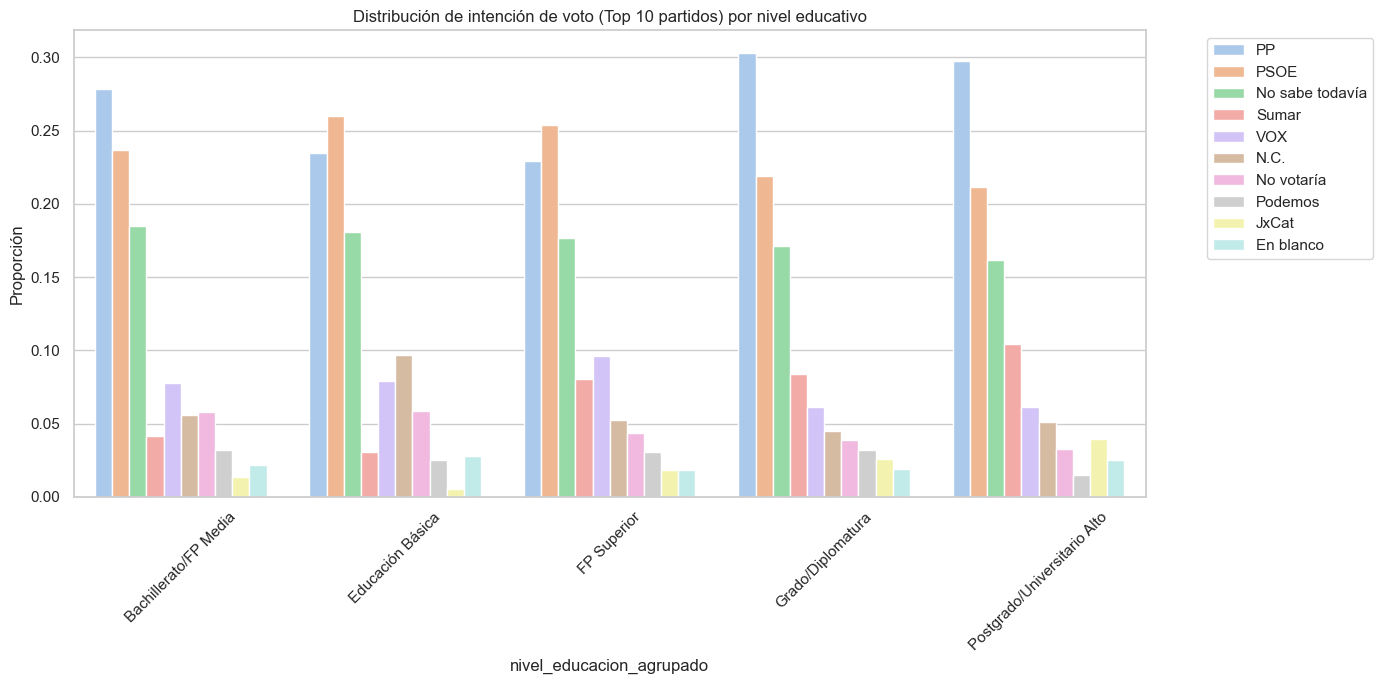

In [54]:
# Contar votos por partido
top_partidos = data['intencion_voto_generales'].value_counts().nlargest(10).index

# Filtrar para incluir solo esos partidos
tabla = pd.crosstab(data['nivel_educacion_agrupado'], data['intencion_voto_generales'])
tabla = tabla[top_partidos]

# Normalizar filas
tabla_norm = tabla.div(tabla.sum(axis=1), axis=0)

# Melt para seaborn
tabla_reset = tabla_norm.reset_index().melt(id_vars='nivel_educacion_agrupado', var_name='Partido', value_name='Proporción')

plt.figure(figsize=(14,7))
sns.barplot(data=tabla_reset, x='nivel_educacion_agrupado', y='Proporción', hue='Partido')
plt.title('Distribución de intención de voto (Top 10 partidos) por nivel educativo')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Distribución de la intención de voto por nivel educativo: análisis descriptivo

## Resumen
El presente análisis describe la distribución de la intención de voto en España según nivel educativo, basado en la proporción de preferencias para las diez opciones electorales más frecuentes. Los resultados evidencian diferencias sistemáticas asociadas al nivel de formación, sugiriendo la persistencia de clivajes educativos en el comportamiento electoral.

## Introducción
El nivel educativo es una de las variables sociodemográficas más relevantes en la explicación del comportamiento electoral. Diversos estudios han identificado patrones consistentes entre la formación académica y la preferencia partidaria (Lipset, 1960; Nieuwbeerta & Graaf, 1999). Cabe mencionar que se reflejan las opciones partidistas no así las idológicas. 

Este análisis relexiona sobre la distribución de la intención de voto en España desagregada en cinco grupos educativos:

- Educación Básica
- Bachillerato/FP Media
- FP Superior
- Grado/Diplomatura
- Postgrado/Universitario Alto

## Resultados

### 1. Predominio del Partido Popular (PP)
El PP es la opción más frecuente en todos los niveles educativos. Su proporción aumenta con el nivel de estudios, superando el 30 % en Grado/Diplomatura y Postgrado/Universitario Alto. Esto sugiere mayor afinidad en votantes con formación universitaria, posiblemente vinculada a perfiles socioeconómicos de clase media-alta y preferencias por políticas económicas liberales.

### 2. Distribución del PSOE
El PSOE presenta un patrón inverso. Su mayor proporción (~26 %) aparece en Educación Básica y desciende progresivamente hasta ~21 % en Postgrado. Este gradiente confirma su perfil más popular y su histórica conexión con segmentos de menor formación.

### 3. Ascenso de Sumar en niveles superiores
Sumar muestra una tendencia claramente creciente con el nivel educativo: de ~3 % en Educación Básica a ~10 % en Postgrado. Esto refleja un perfil más progresista, joven y urbano, alineado con la nueva izquierda europea.

### 4. Indecisión y abstencionismo potencial
- *No sabe todavía* es más alto en niveles educativos bajos y decrece conforme aumenta la formación.
- *No votaría* también es más frecuente en Educación Básica y Bachillerato/FP Media (~6 %), reduciéndose a ~3 % en Postgrado.

Estos patrones sugieren que la indecisión y la abstención están negativamente correlacionadas con la formación académica, resultado consistente con la literatura sobre capital cultural y politización (Verba et al., 1995).

### 5. Estabilidad relativa de VOX
VOX muestra un patrón más plano (~6–10 %) en todos los niveles educativos. Su punto más alto es en FP Superior (~10 %), con leve reducción en los niveles universitarios. Esto sugiere un apoyo relativamente transversal, aunque con un sesgo leve hacia la formación media.

### 6. Otros partidos y opciones
- **Podemos**: proporciones bajas (~2–3 %), estables por nivel educativo.
- **JxCat**: muy bajos pero levemente superiores en Postgrado (~4 %), probablemente por la concentración de votantes soberanistas con estudios universitarios en Cataluña.
- **En blanco**: residual y homogénea (~2–3 %).

## Discusión
Los resultados confirman la existencia de clivajes educativos en la intención de voto:

- PP y Sumar exhiben patrones divergentes vinculados al nivel de formación, consolidando un eje de competencia entre una derecha liberal más educada y una nueva izquierda urbana y universitaria.
- El PSOE mantiene un electorado más fuerte en los segmentos con menor formación, aunque sigue siendo competitivo en todos los grupos.

Asimismo, la mayor indecisión y abstencionismo en niveles educativos bajos subraya desigualdades en la participación política, resaltando la importancia de políticas de movilización y educación cívica para estos sectores.

## Conclusiones
El nivel educativo sigue siendo un factor relevante en el comportamiento electoral en España. Este análisis descriptivo confirma la segmentación de preferencias partidarias en función de la formación académica, reproduciendo patrones observados en otros contextos europeos. Futuros estudios deberían explorar estas relaciones de forma causal, incorporando variables como edad, territorio o clase social para construir modelos explicativos más robustos.
